## LTEE-COMETS-Jenga.ipynb by Rohan Maddamsetti

See documentation at: 
https://segrelab.github.io/comets-manual/citrate/  
https://segrelab.github.io/comets-manual/competition_assay/

In [24]:
import cometspy as c
import matplotlib as plt
import cobra.test
import cobra
import pandas as pd
import numpy as np
from scipy import stats
from os import path

## Question: have any of the BiGG core, superessential, or specialist/generalist enzymes been knocked out in the 50K LTEE A clones?

In [52]:
KOed_50K_metabolic_genes = pd.read_csv("../results/metabolic-enzymes/KOed-metabolic-enzymes-in-LTEE-50K-A-clones.csv")

KOed_BiGG_core = KOed_50K_metabolic_genes[KOed_50K_metabolic_genes['MetabolicClass'] == "BiGG_core"]
KOed_superessential = KOed_50K_metabolic_genes[KOed_50K_metabolic_genes['MetabolicClass'] == "Superessential"]
KOed_specialist = KOed_50K_metabolic_genes[KOed_50K_metabolic_genes['MetabolicClass'] == "Specialist"]
KOed_generalist = KOed_50K_metabolic_genes[KOed_50K_metabolic_genes['MetabolicClass'] == "Generalist"]

In [54]:
KOed_BiGG_core

Population  Gene MetabolicClass  locus_tag blattner  gene_length  \
0       Ara-1  appB      BiGG_core  ECB_00982    b0979         1137   
1       Ara-1  pykF      BiGG_core  ECB_01645    b1676         1413   
2       Ara-1  gltB      BiGG_core  ECB_03077    b3212         4554   
3       Ara-1  pflC      BiGG_core  ECB_03837    b3952          879   
4       Ara-2  pfkB      BiGG_core  ECB_01692    b1723          930   
5       Ara-2  fbaB      BiGG_core  ECB_02025    b2097         1053   
6       Ara-2   dld      BiGG_core  ECB_02063    b2133         1716   
7       Ara-2  eutI      BiGG_core  ECB_02349    b2458         1017   
8       Ara-3  kgtP      BiGG_core  ECB_02481    b2587         1299   
9       Ara-3  tdcE      BiGG_core  ECB_02981    b3114         2295   
10      Ara-3  tdcD      BiGG_core  ECB_02982    b3115         1221   
11      Ara-3  aceA      BiGG_core  ECB_03887    b4015         1305   
12      Ara-3  rpiB      BiGG_core  ECB_03962    b4090          450   
13      Ara-3  fumB      BiGG_core  ECB_03993    b4122         1647   
14      Ara-4  pflB      BiGG_core  ECB_00907    b0903         2283   
15      Ara-4  acnA      BiGG_core  ECB_01253    b1276         2676   
16      Ara-4  sfcA      BiGG_core  ECB_01437    b1479         1698   
17      Ara-4  fumC      BiGG_core  ECB_01580    b1611         1404   
18      Ara-4  fbaB      BiGG_core  ECB_02025    b2097         1053   
19      Ara-4  yghK      BiGG_core  ECB_02843    b2975         1683   
20      Ara-4  glcB      BiGG_core  ECB_02844    b2976         2172   
21      Ara-4  pitB      BiGG_core  ECB_02863    b2987         1500   
22      Ara-6  maeB      BiGG_core  ECB_02354    b2463         2280   
23      Ara-6  gltB      BiGG_core  ECB_03077    b3212         4554   
24      Ara-6  gltD      BiGG_core  ECB_03078    b3213         1419   
25      Ara+1  pflB      BiGG_core  ECB_00907    b0903         2283   
26      Ara+1  yghK      BiGG_core  ECB_02843    b2975         1683   
27      Ara+2  appC      BiGG_core  ECB_00981    b0978         1545   
28      Ara+2  tktB      BiGG_core  ECB_02356    b2465         2004   
29      Ara+2  sgcE      BiGG_core  ECB_04166    b4301          633   
30      Ara+3  pflB      BiGG_core  ECB_00907    b0903         2283   
31      Ara+3  adhE      BiGG_core  ECB_01215    b1241         2676   
32      Ara+3  focB      BiGG_core  ECB_02384    b2492          849   
33      Ara+4  pykF      BiGG_core  ECB_01645    b1676         1413   
34      Ara+4  fbaB      BiGG_core  ECB_02025    b2097         1053   
35      Ara+4  gltB      BiGG_core  ECB_03077    b3212         4554   
36      Ara+5  yghK      BiGG_core  ECB_02843    b2975         1683   
37      Ara+5  glcB      BiGG_core  ECB_02844    b2976         2172   
38      Ara+5  pitB      BiGG_core  ECB_02863    b2987         1500   
39      Ara+5  gltP      BiGG_core  ECB_03949    b4077         1314   
40      Ara+6  yghK      BiGG_core  ECB_02843    b2975         1683   

                                              product    start      end  \
0                 cytochrome bd-II oxidase subunit II  1056387  1057523   
1                                     pyruvate kinase  1732965  1734377   
2                    glutamate synthase large subunit  3289867  3294420   
3                  pyruvate formate lyase II activase  4126365  4127243   
4                            6-phosphofructokinase II  1783635  1784564   
5                      fructose-bisphosphate aldolase  2131641  2132693   
6   D-lactate dehydrogenase FAD-binding NADH indep...  2173423  2175138   
7             predicted phosphotransacetylase subunit  2493318  2494334   
8                     alpha-ketoglutarate transporter  2645941  2647239   
9   pyruvate formate-lyase 4/2-ketobutyrate format...  3193158  3195452   
10       propionate kinase/acetate kinase C anaerobic  3195486  3196706   
11                                   isocitrate lyase  4196554  4197858   
12                     ribose-5-phosphate iso

In [53]:
KOed_superessential

Population  Gene  MetabolicClass  locus_tag blattner  gene_length  \
41      Ara-1  pgpB  Superessential  ECB_01255    b1278          765   
42      Ara-2  mrcB  Superessential  ECB_00148    b0149         2526   
43      Ara-2  thiD  Superessential  ECB_02031    b2103          801   
44      Ara-4  thiD  Superessential  ECB_02031    b2103          801   
45      Ara-5  ispF  Superessential  ECB_02596    b2746          480   
46      Ara-5  ispD  Superessential  ECB_02597    b2747          711   
47      Ara+1  mrdA  Superessential  ECB_00604    b0635         1902   
48      Ara+1  ispF  Superessential  ECB_02596    b2746          480   
49      Ara+1  ispD  Superessential  ECB_02597    b2747          711   
50      Ara+3  thiG  Superessential  ECB_03867    b3991          771   
51      Ara+4  thiD  Superessential  ECB_02031    b2103          801   

                                              product    start      end  \
41                   phosphatidylglycerophosphatase B  1337702  1338466   
42                      penicillin-binding protein 1b   167581   170106   
43                     phosphomethylpyrimidine kinase  2137845  2138645   
44                     phosphomethylpyrimidine kinase  2137845  2138645   
45  2-C-methyl-D-erythritol 24-cyclodiphosphate sy...  2766162  2766641   
46  2-C-methyl-D-erythritol 4-phosphate cytidylylt...  2766641  2767351   
47  transpeptidase involved in peptidoglycan synth...   648900   650801   
48  2-C-methyl-D-erythritol 24-cyclodiphosphate sy...  2766162  2766641   
49  2-C-methyl-D-erythritol 4-phosphate cytidylylt...  2766641  2767351   
50                                  thiazole synthase  4171476  4172246   
51                     phosphomethylpyrimidine kinase  2137845  2138645   

    strand  
41       1  
42       1  
43      -1  
44      -1  
45      -1  
46      -1  
47      -1  
48      -1  
49      -1  
50      -1  
51      -1

In [55]:
KOed_specialist

Population  Gene MetabolicClass  locus_tag blattner  gene_length  \
52       Ara-1  pykF     Specialist  ECB_01645    b1676         1413   
53       Ara-1  rfbA     Specialist  ECB_01945    b2039          879   
54       Ara-1  rfbD     Specialist  ECB_01946    b2040          900   
55       Ara-1  rfbB     Specialist  ECB_01947    b2041         1086   
56       Ara-1  cpsG     Specialist  ECB_01954    b2048         1371   
..         ...   ...            ...        ...      ...          ...   
360      Ara+6  rbsA     Specialist  ECB_03635    b3749         1506   
361      Ara+6  rbsC     Specialist  ECB_03636    b3750          966   
362      Ara+6  rbsB     Specialist  ECB_03637    b3751          891   
363      Ara+6  rbsK     Specialist  ECB_03638    b3752          930   
364      Ara+6  metH     Specialist  ECB_03891    b4019         3684   

                                               product    start      end  \
52                                     pyruvate kinase  1732965  1734377   
53           glucose-1-phosphate thymidylyltransferase  2043371  2044249   
54   dTDP-4-dehydrorhamnose reductase subunit NADP-...  2044308  2045207   
55            dTDP-glucose 46 dehydratase NADP-binding  2045207  2046292   
56                                  phosphomannomutase  2054726  2056096   
..                                                 ...      ...      ...   
360  fused D-ribose transporter subunits of ABC sup...  3895585  3897090   
361            ribose ABC transporter permease protein  3897095  3898060   
362                       D-ribose transporter subunit  3898085  3898975   
363                                         ribokinase  3899101  3900030   
364                  B12-dependent methionine synthase  4202759  4206442   

     strand  
52        1  
53       -1  
54       -1  
55       -1  
56       -1  
..      ...  
360       1  
361       1  
362       1  
363       1  
364       1  

[313 rows x 10 columns]

In [56]:
KOed_generalist

Population  Gene MetabolicClass  locus_tag blattner  gene_length  \
365      Ara-1  mutT     Generalist  ECB_00100    b0099          390   
366      Ara-1  appB     Generalist  ECB_00982    b0979         1137   
367      Ara-1  oppB     Generalist  ECB_01218    b1244          921   
368      Ara-1  pgpB     Generalist  ECB_01255    b1278          765   
369      Ara-1  pepB     Generalist  ECB_02415    b2523         1284   
..         ...   ...            ...        ...      ...          ...   
550      Ara+6  fepB     Generalist  ECB_00559    b0592          957   
551      Ara+6  chaA     Generalist  ECB_01194    b1216         1101   
552      Ara+6  tynA     Generalist  ECB_01358    b1386         1719   
553      Ara+6  hycC     Generalist  ECB_02573    b2723         1827   
554      Ara+6  yghK     Generalist  ECB_02843    b2975         1683   

                                               product    start      end  \
365  nucleoside triphosphate pyrophosphohydrolase m...   113848   114237   
366                cytochrome bd-II oxidase subunit II  1056387  1057523   
367  oligopeptide permease ABC transporter membrane...  1300493  1301413   
368                   phosphatidylglycerophosphatase B  1337702  1338466   
369                                   aminopeptidase B  2575894  2577177   
..                                                 ...      ...      ...   
550              iron-enterobactin transporter subunit   606262   607218   
551                   calcium/sodium:proton antiporter  1270898  1271998   
552                  tyramine oxidase copper-requiring  1440683  1442401   
553                       NADH dehydrogenase subunit N  2742275  2744101   
554                              glycolate transporter  3046489  3048171   

     strand  
365       1  
366       1  
367       1  
368       1  
369      -1  
..      ...  
550      -1  
551      -1  
552      -1  
553      -1  
554      -1  

[190 rows x 10 columns]

## Basic metabolic models to play with.

In [2]:
## pick a baseline metagen
BiGG_model_dir = "../data/BiGG-models"

# the E. coli K-12 iJO1366 model: this is the best curated complete E. coli model.
K12_model = cobra.io.load_json_model(path.join(BiGG_model_dir, "iJO1366.json"))

# the E. coli REL606 iECB_1328 model: most relevant to LTEE, but has stochiometric inconsistencies
## in hydrogen/proton conservation.
REL606_model = cobra.io.load_json_model(path.join(BiGG_model_dir, "iECB_1328.json"))

## The simplest well-curated model: E. coli core metabolism.
core_model = cobra.io.load_json_model(path.join(BiGG_model_dir, "e_coli_core.json"))

## The next cell should be updated when I change the basic model.

In [3]:
WT = core_model.copy()
WT.id = 'REL606'

# Set exchange reaction lower bounds to -1000 to allow them being controlled by COMETS 
for i in WT.reactions:
    if 'EX_' in i.id:
        i.lower_bound = -1000.0

## knockout dctA, dcuAB and citT reactions to model the Cit- phenotype in REL606.
## This is not needed for the E. coli core model.
#WT.reactions.SUCCt2_3pp.upper_bound = 0.0
#WT.reactions.SUCCt2_2pp.upper_bound = 0.0
#WT.reactions.CITt7pp.upper_bound = 0.0

## Hypothesis: knocking out pykF intensifies purifying selection on the remaining reactions in E. coli core metabolism (This doesn't seem to be true based on the model).

In [4]:
# generate a pykF knockout mutant.
pykF_mut = WT.copy()
pykF_mut.id = 'pykF'
pykF_mut.reactions.PYK.upper_bound = 0.0

In [5]:
def make_dict_of_KO_strains(anc_model):
    deletion_cobra_models = {}
    for gene_obj in anc_model.genes:
        ## Tricky! gene_obj is an OBJECT in anc_model.genes-- not a string.
        ## we want to get the corresponding object in cur_KO_model to knock out.
        genestr = str(gene_obj) ## immediately convert into a string for convenience.
        cur_KO_model = anc_model.copy()
        cur_KO_model.id = genestr + "_knockout"
        cur_gene = cur_KO_model.genes.get_by_id(genestr)
        cobra.manipulation.delete_model_genes(cur_KO_model, [cur_gene])
        deletion_cobra_models[genestr] = cur_KO_model
    return deletion_cobra_models

In [6]:
## generate all single knockouts from the focal strains.
WT_deletion_cobra_models = make_dict_of_KO_strains(WT)
pykF_mut_deletion_cobra_models  = make_dict_of_KO_strains(pykF_mut)

In [30]:
def run_COMETS_DM25_fitness_competition(WT_cobra_model, KO_cobra_model):
    
    ## Set parameters for the simulation per
    ## https://segrelab.github.io/comets-manual/citrate/
    settings = c.params()
    settings.all_params['timeStep'] = 1.0 ## 1 hour
    settings.all_params['deathRate'] = 0 ## Cit- should not die in DM25-- death also complicates Malthusian fitness
    settings.all_params['batchDilution'] = True
    settings.all_params['dilTime'] = 24
    settings.all_params['dilFactor'] = 100
    settings.all_params['cellSize'] = 3.9e-13 #Size of a single REL606 cell
    settings.all_params['minSpaceBiomass'] = 3.8e-13

    settings.set_param('maxCycles', 24) ## 24 hours
    
    flask = c.layout()
    #Set up media to be DM25
    flask.add_typical_trace_metabolites()
    flask.set_specific_metabolite('glc__D_e', 0.000139)
    flask.set_specific_metabolite('cit_e', 0.0017)
    
    ## Generate comets models and set their initial population size.
    anc = c.model(WT_cobra_model)
    anc.initial_pop = [0, 0, 3.9e-11]

    mutpop = c.model(KO_cobra_model)
    mutpop.initial_pop = [0, 0, 3.9e-11]

    ## Add the models to the simulation.
    flask.add_model(anc)
    flask.add_model(mutpop)
    
    ## Run COMETS.
    comp_assay = c.comets(flask, settings)
    comp_assay.run()
    
    biomass = comp_assay.total_biomass
    biomass['t'] = biomass['cycle'] * comp_assay.parameters.all_params['timeStep']

    ## make a plot of the simulated growth curves for debugging.
    myplot = biomass.drop(columns=['cycle']).plot(x = 't')
    myplot.set_ylabel("Biomass (grams)")
    
    ## calculate Malthusian fitness.
    mut_mass24 = biomass.loc[biomass['t'] == 24, KO_cobra_model.id].iloc[0]
    mut_mass0 = biomass.loc[biomass['t'] == 0, KO_cobra_model.id].iloc[0]
    anc_mass24 = biomass.loc[biomass['t'] == 24, WT_cobra_model.id].iloc[0]
    anc_mass0 = biomass.loc[biomass['t'] == 0, WT_cobra_model.id].iloc[0]
    malthusian_fitness = (mut_mass24/mut_mass0)/(anc_mass24/anc_mass0)
    
    return malthusian_fitness

building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
Mutant Fitness is:  0.6376188299233788


<AxesSubplot:xlabel='t', ylabel='Biomass (grams)'>

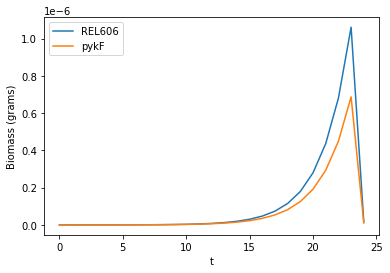

In [32]:
malthusian_fitness = run_COMETS_DM25_fitness_competition(WT, pykF_mut)
print("Mutant Fitness is: ", malthusian_fitness)
myplot

building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added

/Users/Rohandinho/anaconda3/envs/mamba/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)



Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layo


Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layo


Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layo


Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layo


Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!


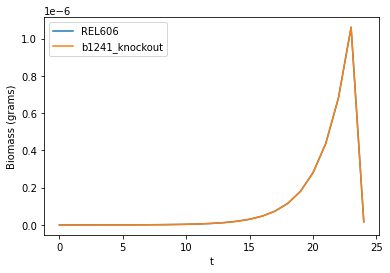

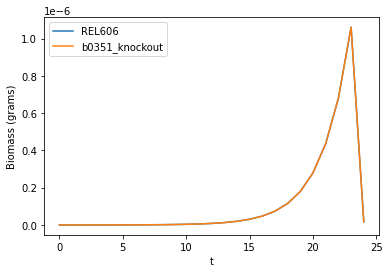

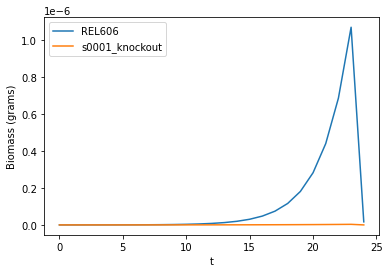

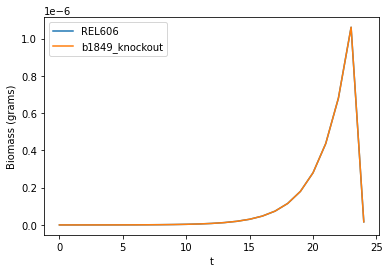

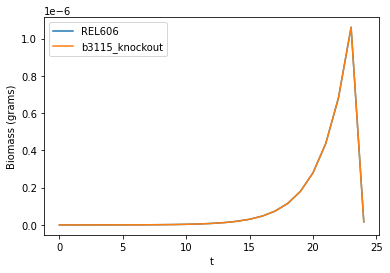

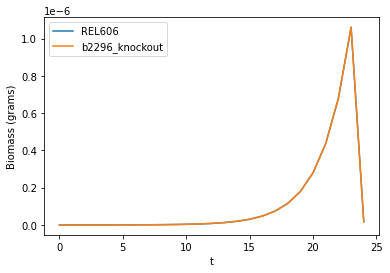

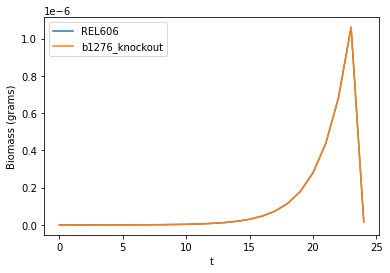

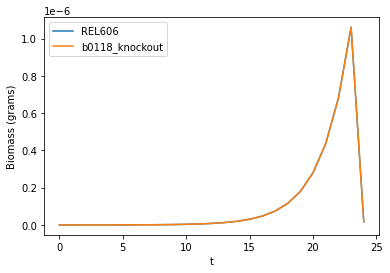

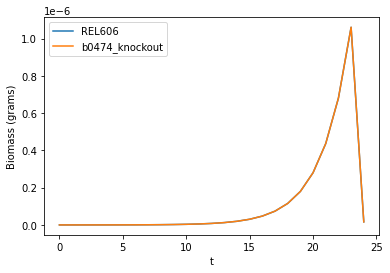

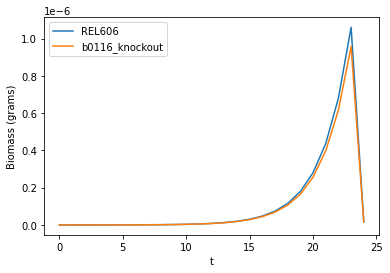

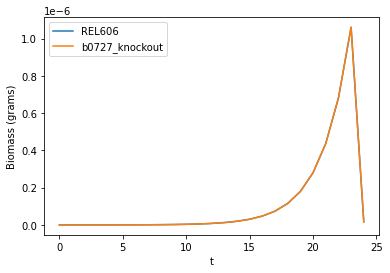

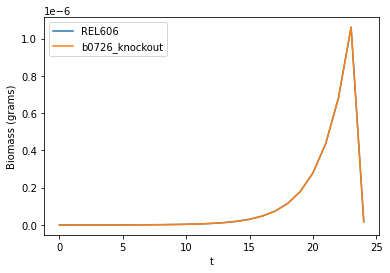

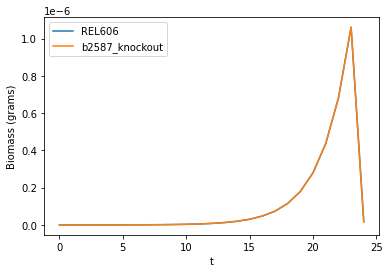

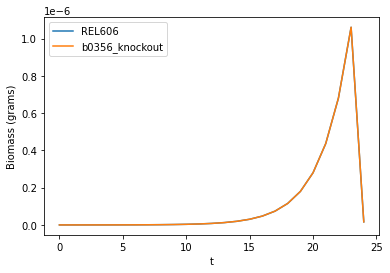

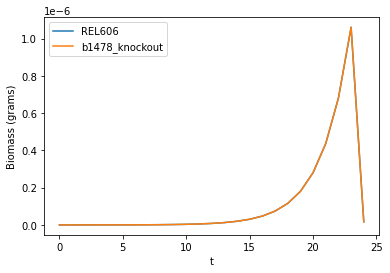

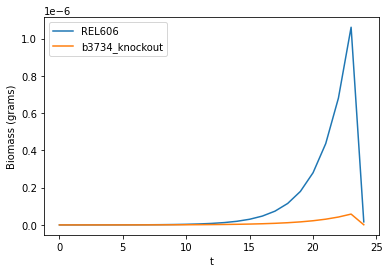

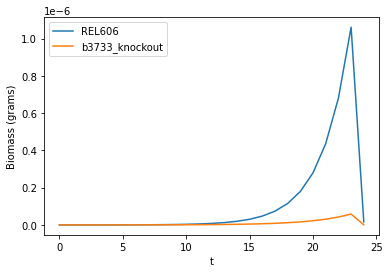

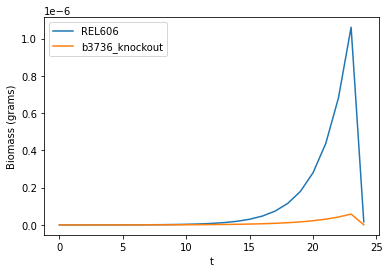

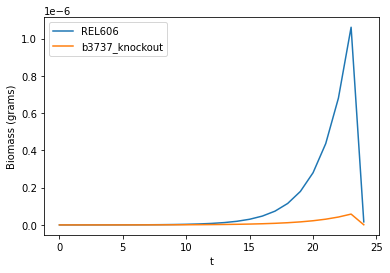

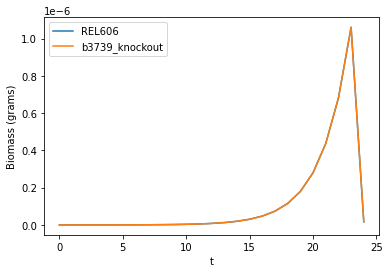

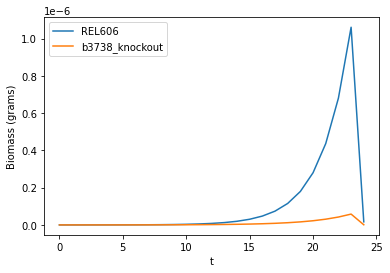

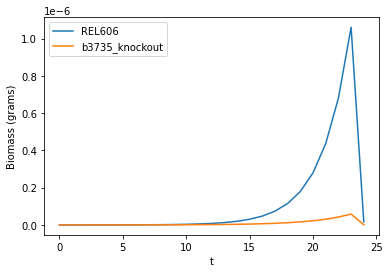

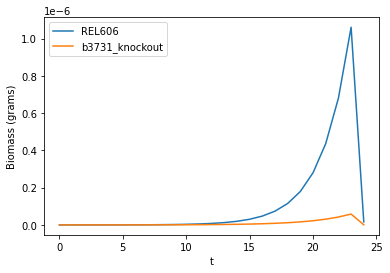

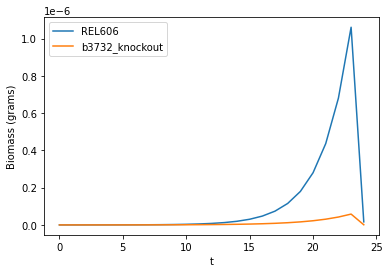

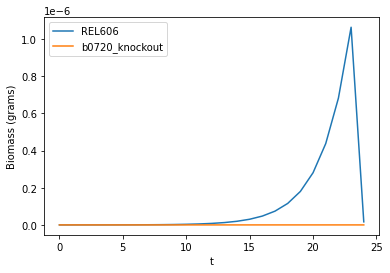

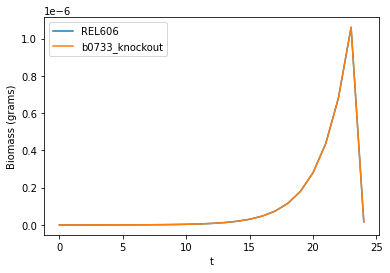

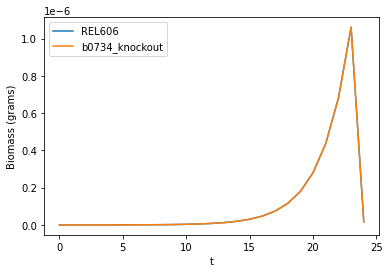

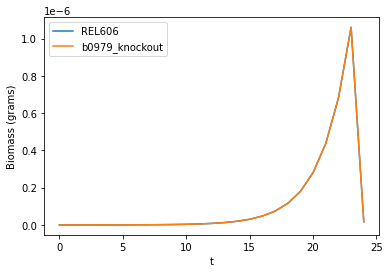

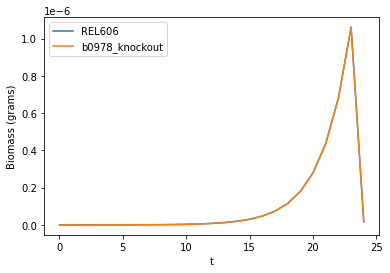

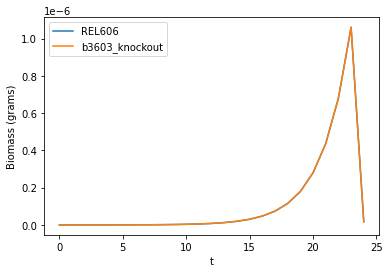

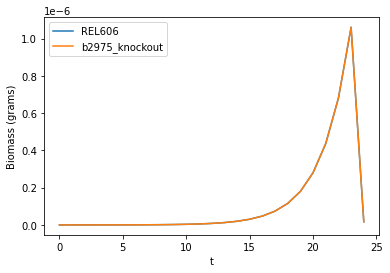

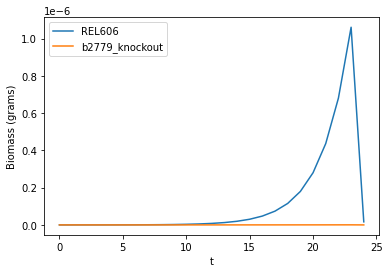

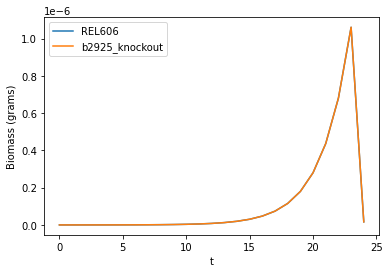

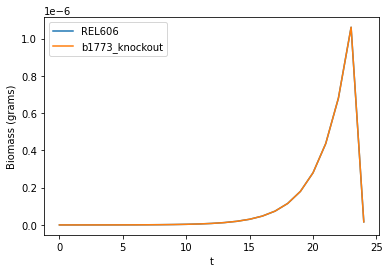

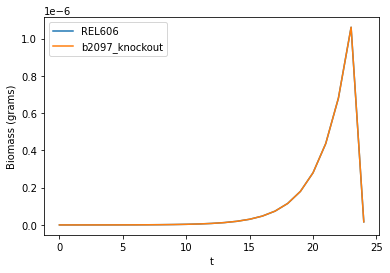

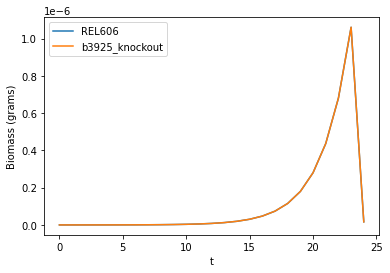

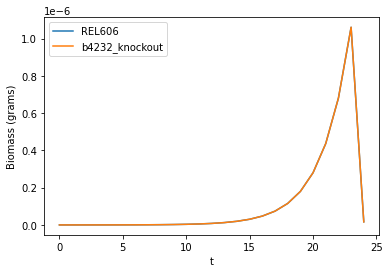

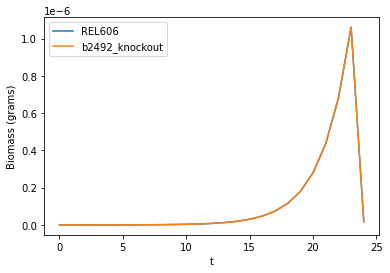

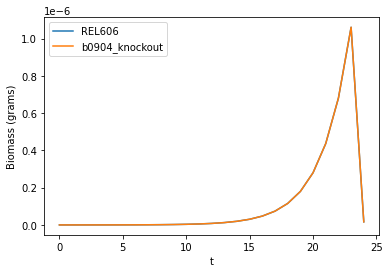

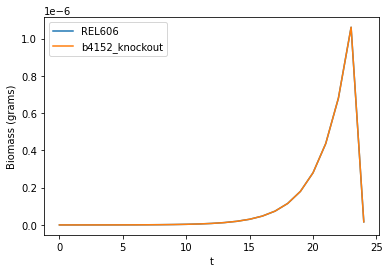

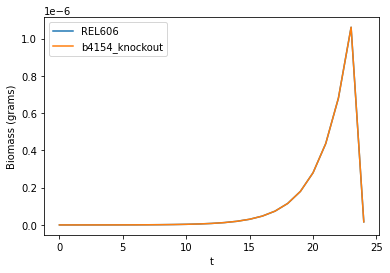

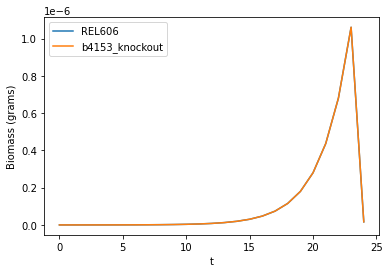

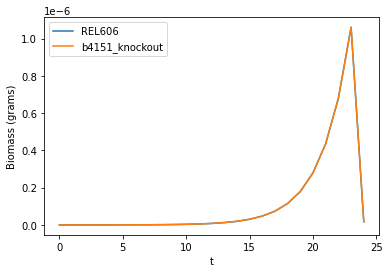

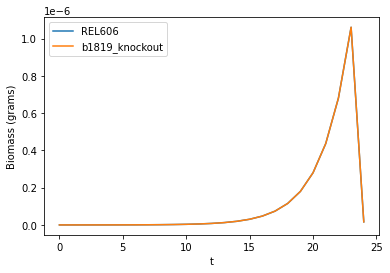

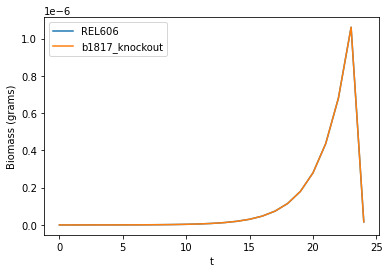

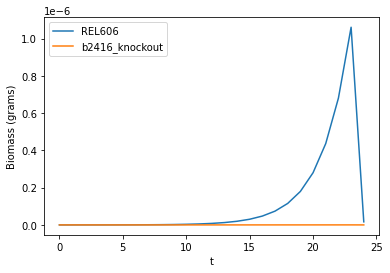

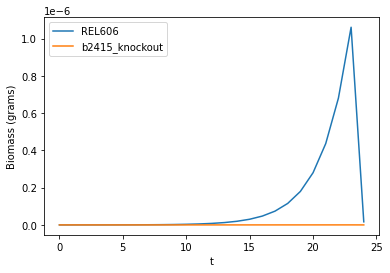

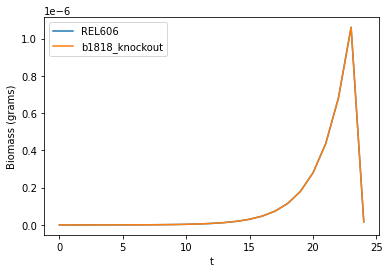

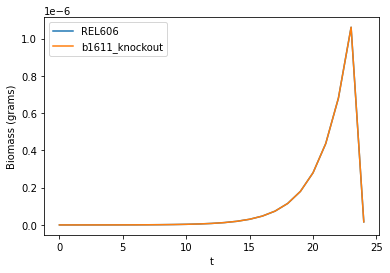

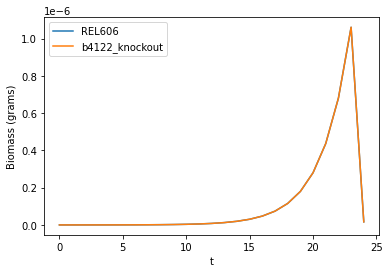

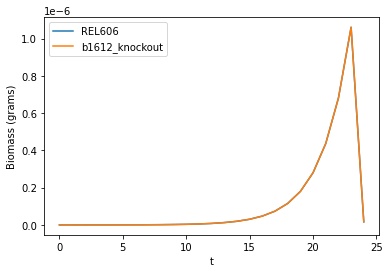

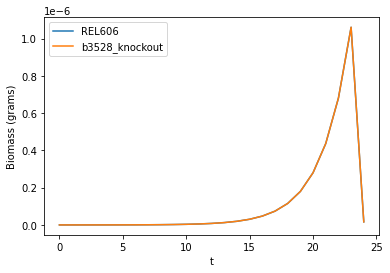

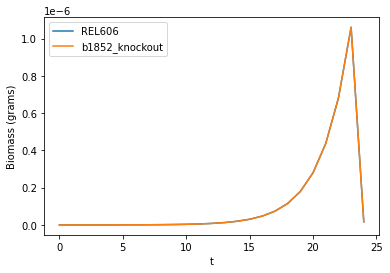

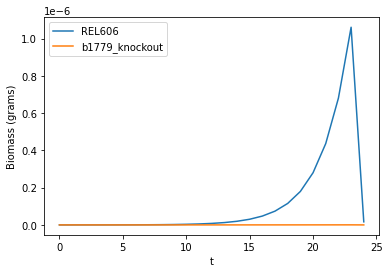

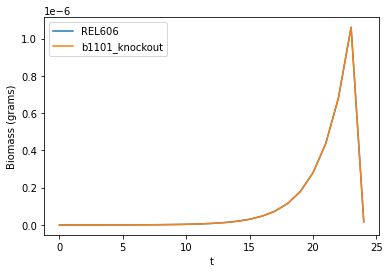

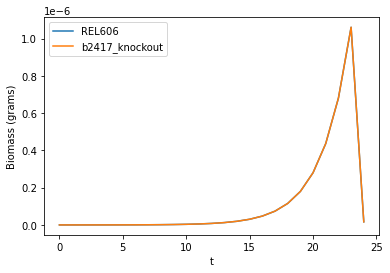

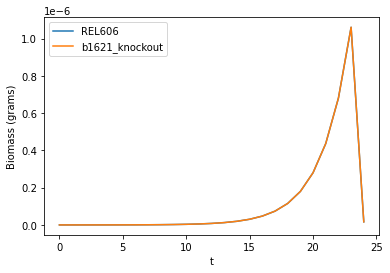

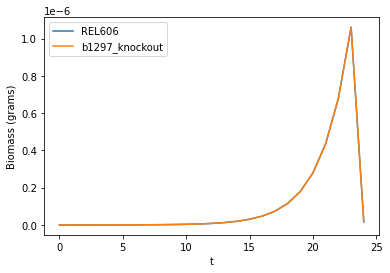

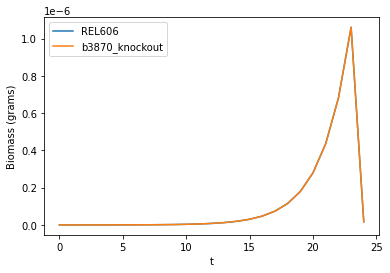

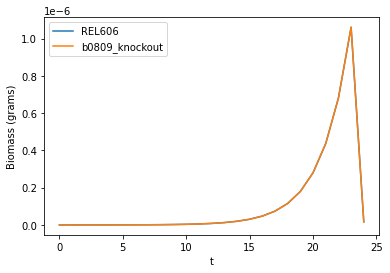

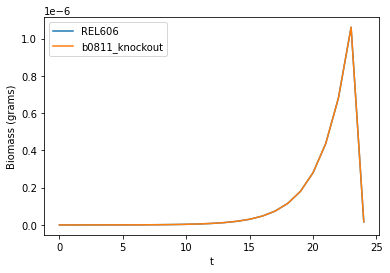

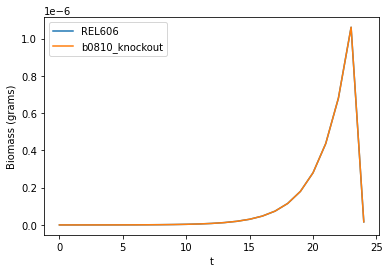

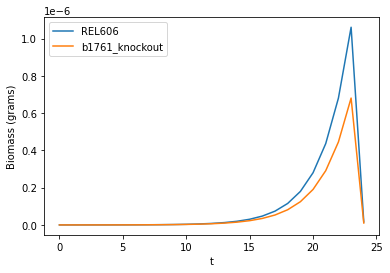

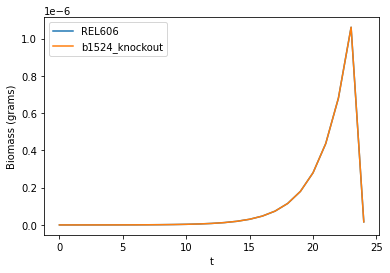

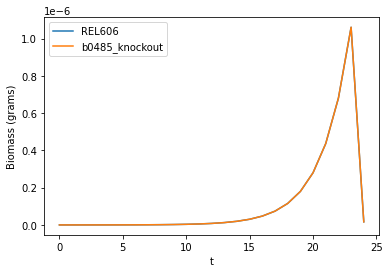

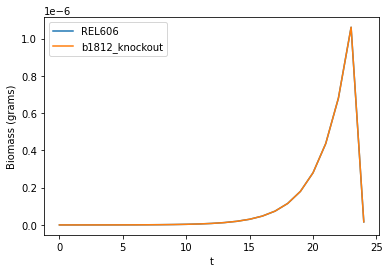

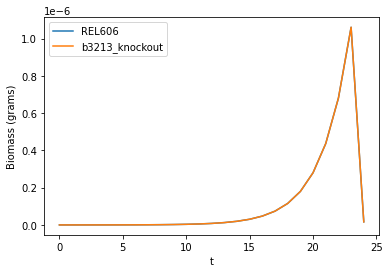

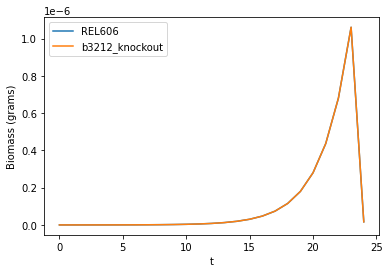

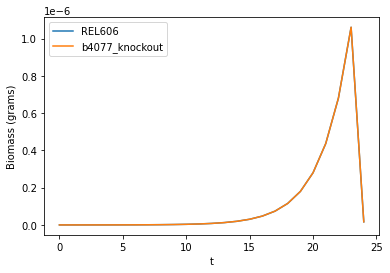

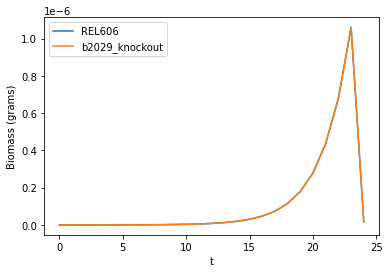

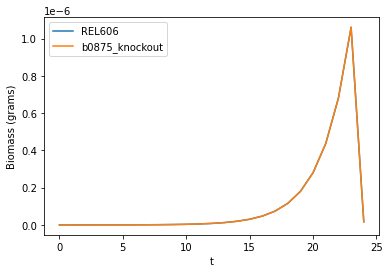

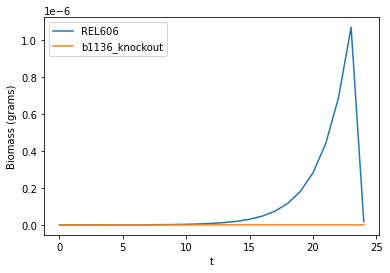

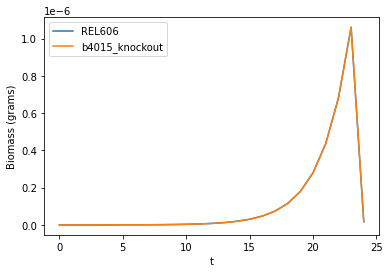

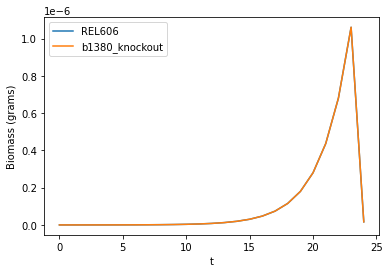

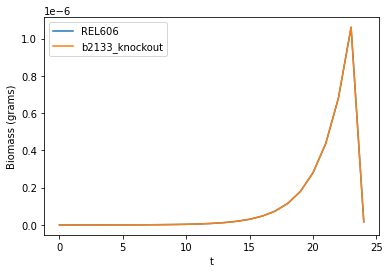

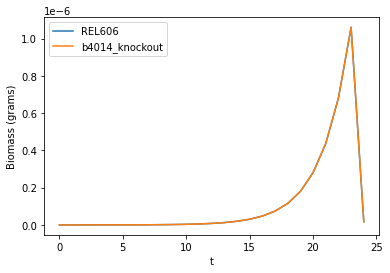

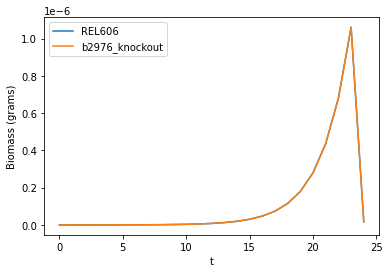

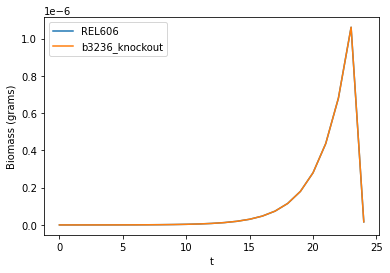

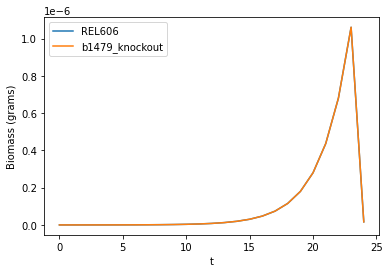

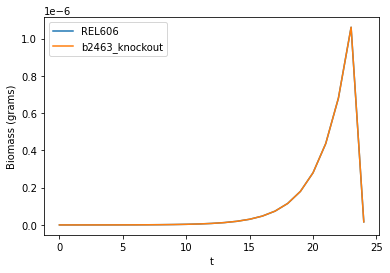

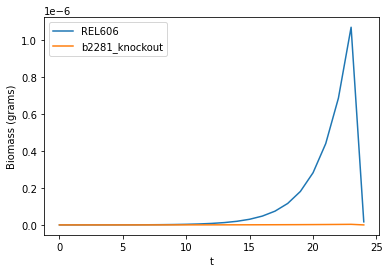

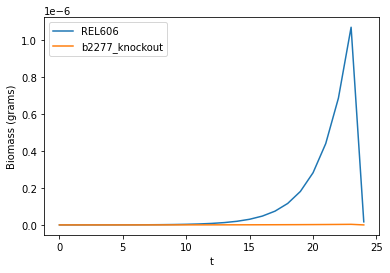

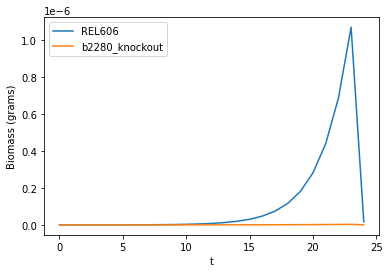

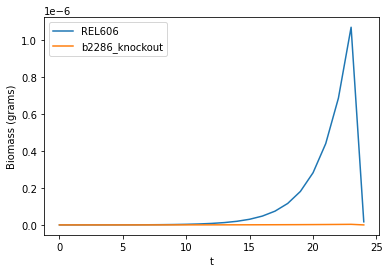

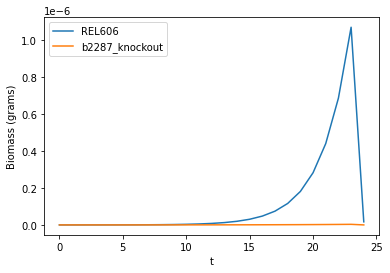

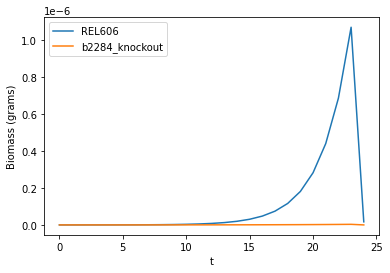

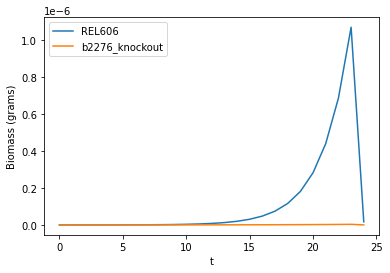

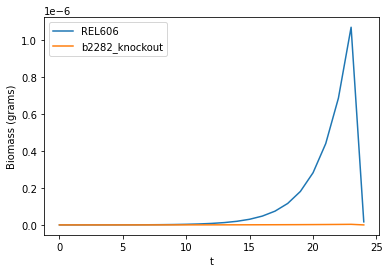

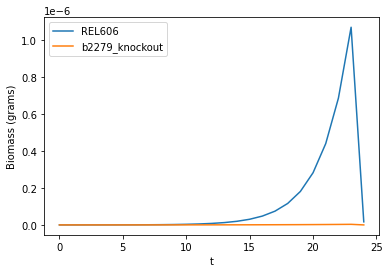

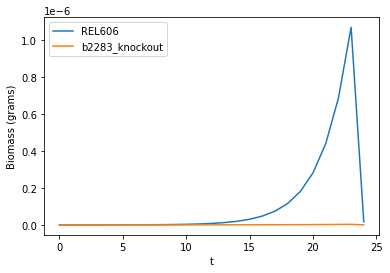

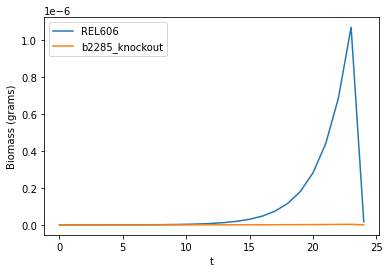

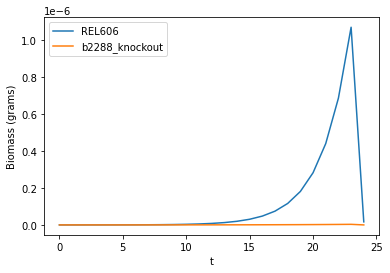

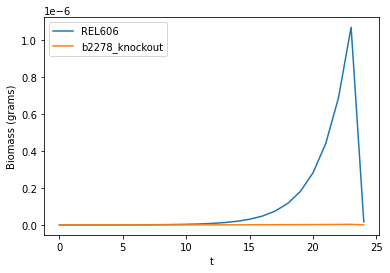

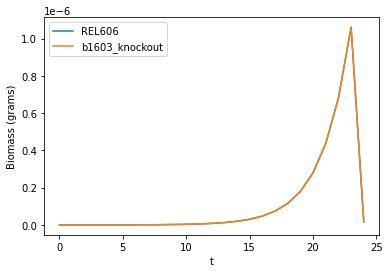

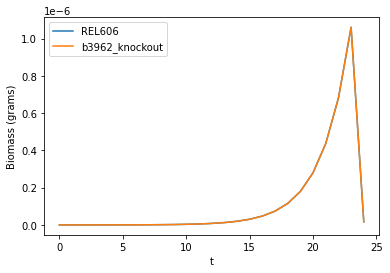

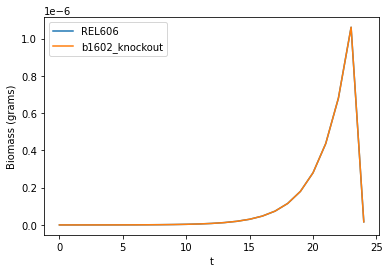

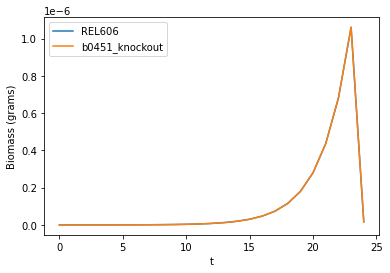

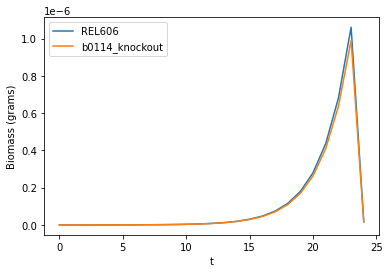

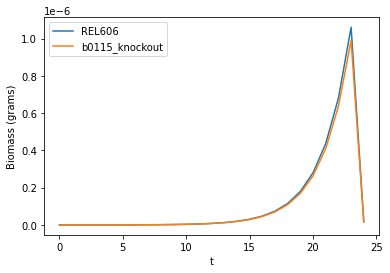

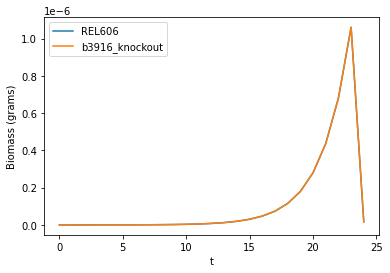

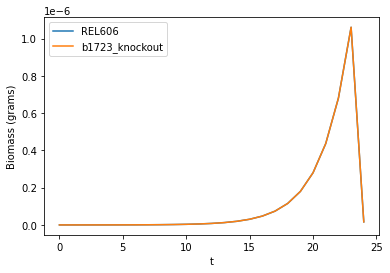

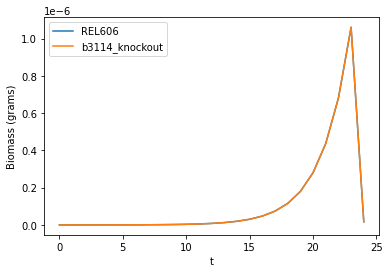

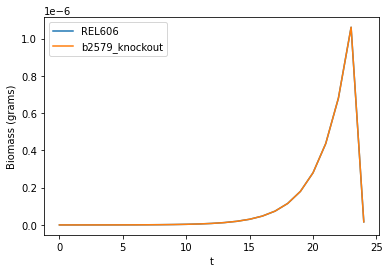

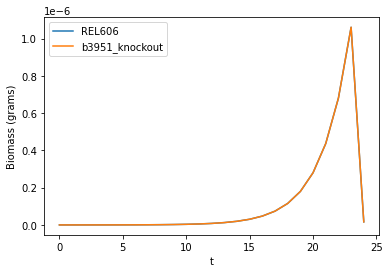

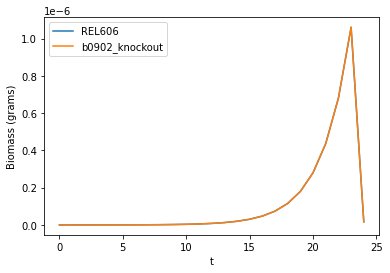

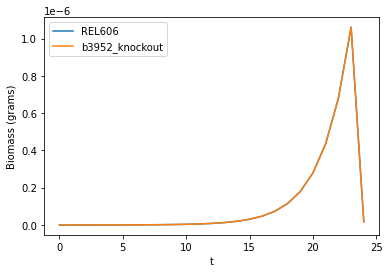

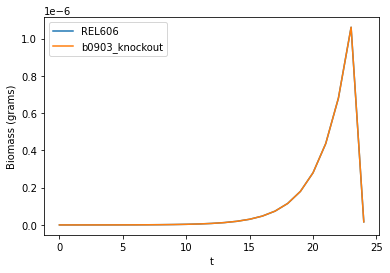

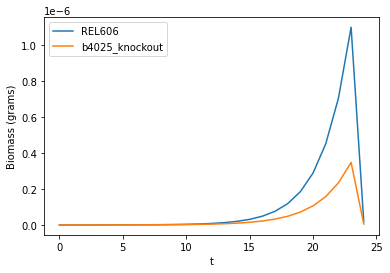

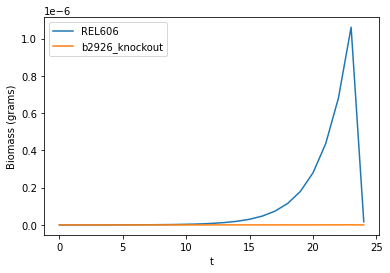

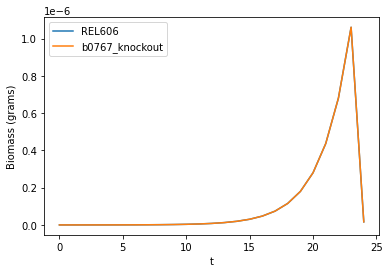

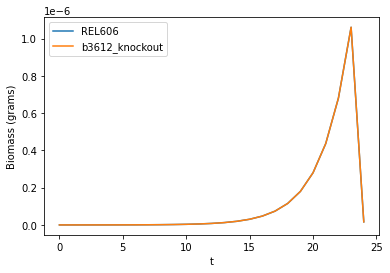

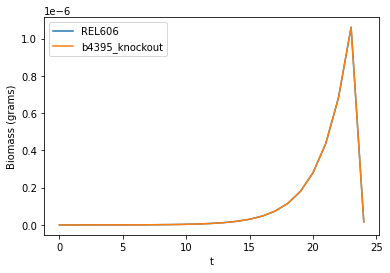

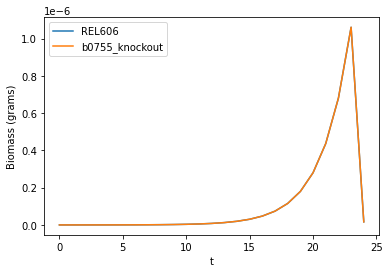

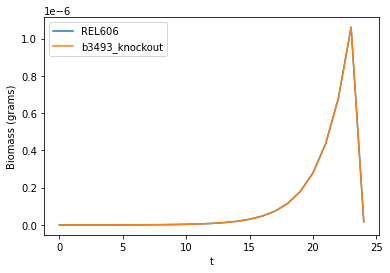

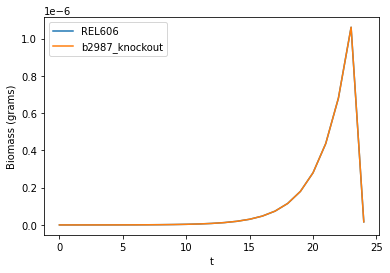

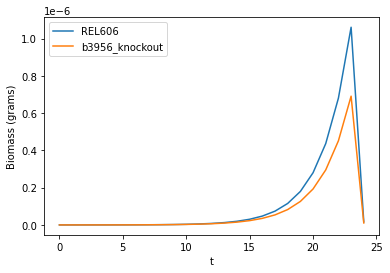

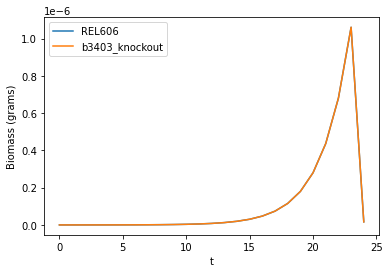

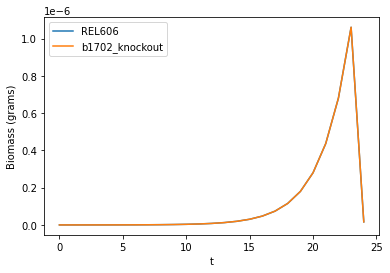

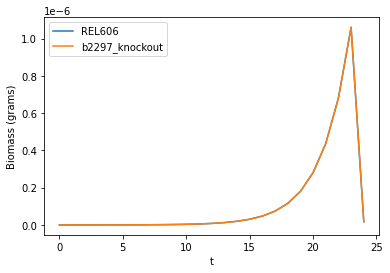

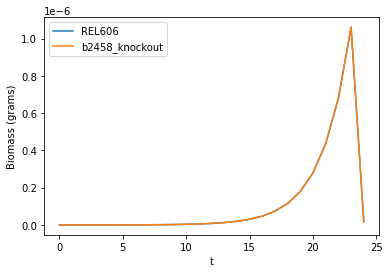

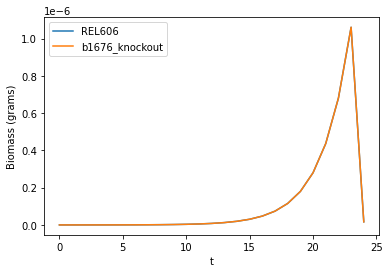

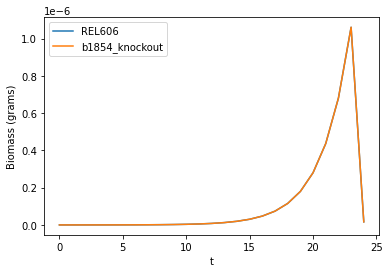

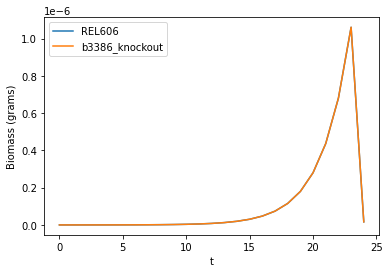

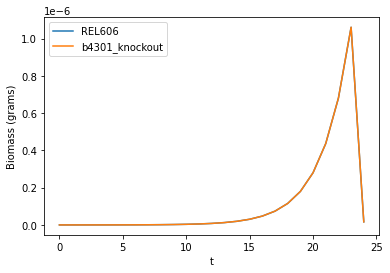

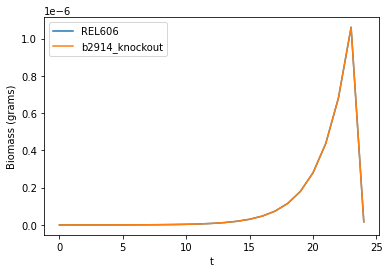

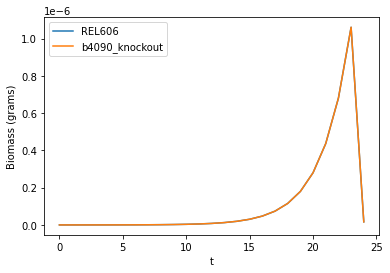

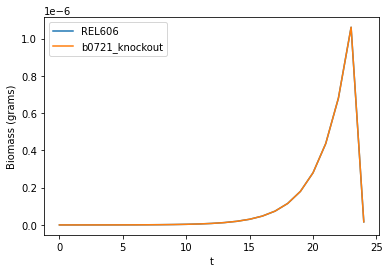

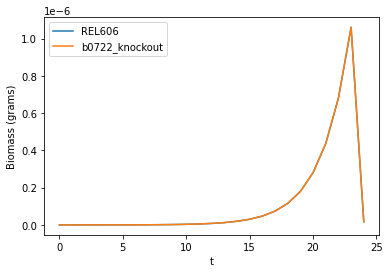

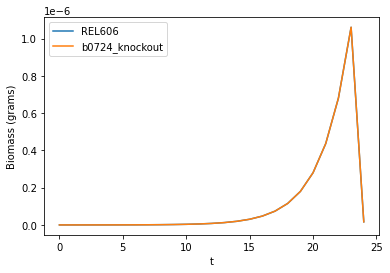

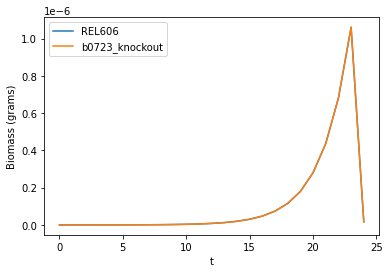

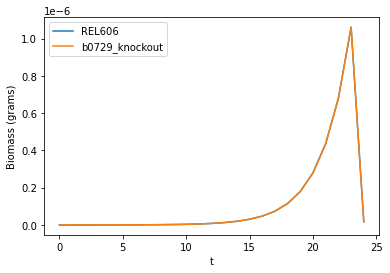

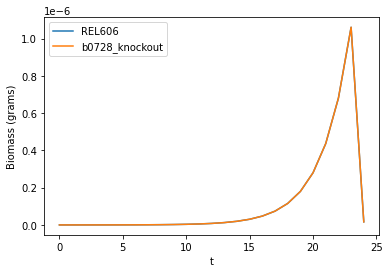

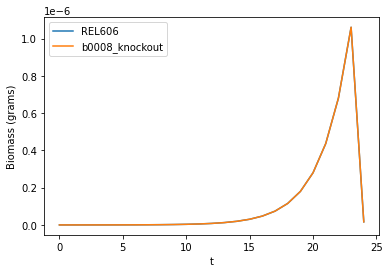

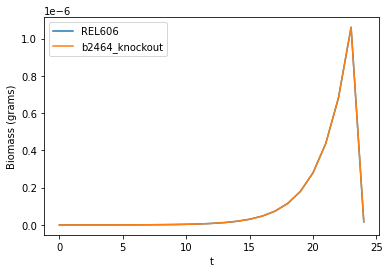

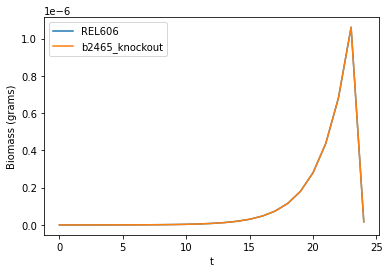

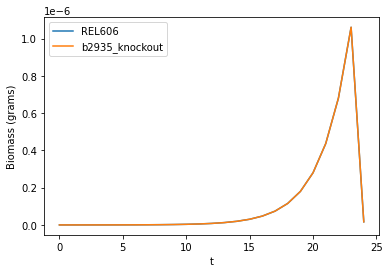

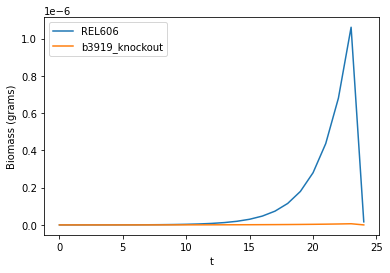

In [9]:
WT_DFE_vec = [run_COMETS_DM25_fitness_competition(WT, mut) for (_, mut) in WT_deletion_cobra_models.items()]

building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added

/Users/Rohandinho/anaconda3/envs/mamba/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)



Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layo


Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layo


Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layo


Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layo


Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...
Done!


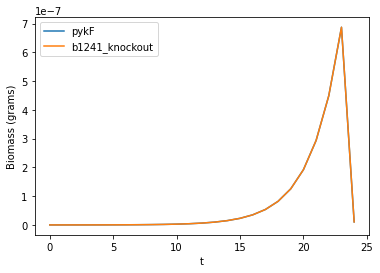

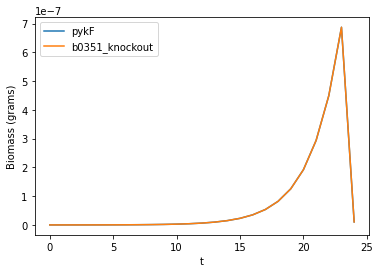

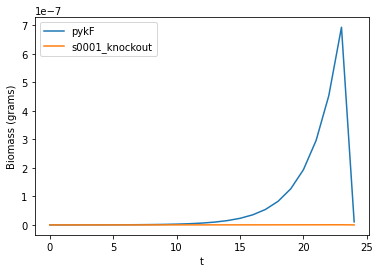

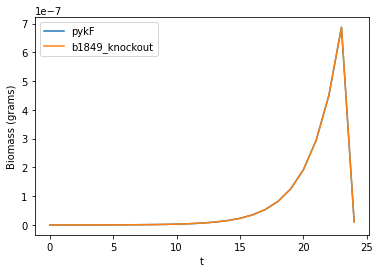

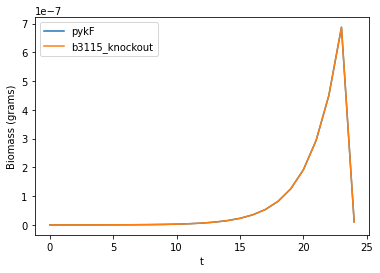

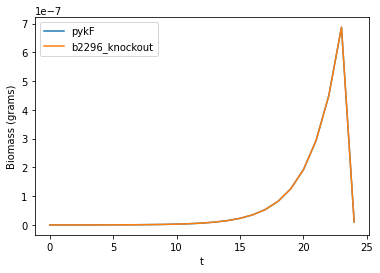

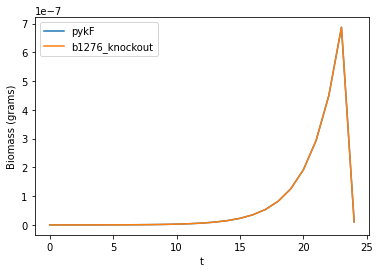

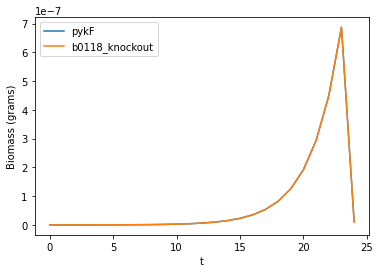

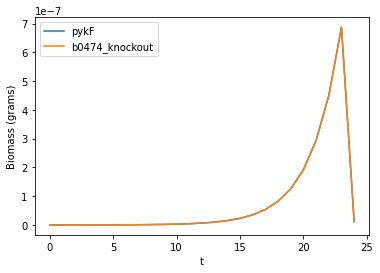

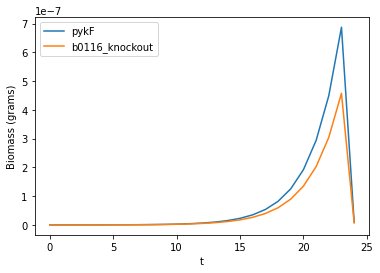

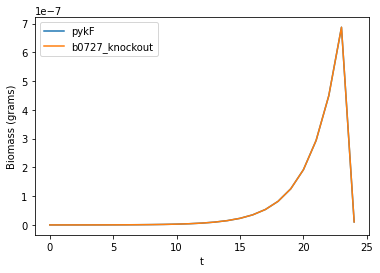

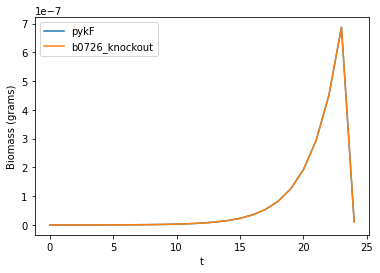

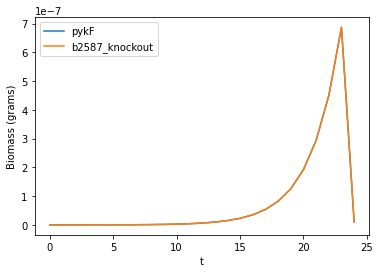

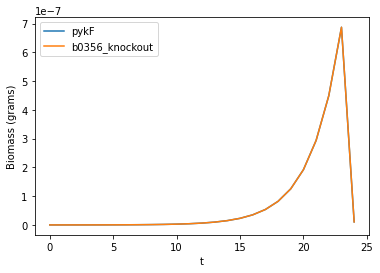

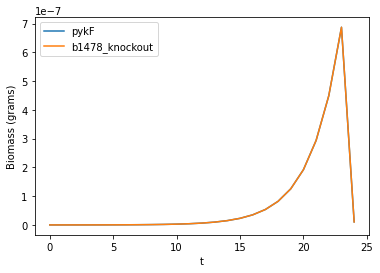

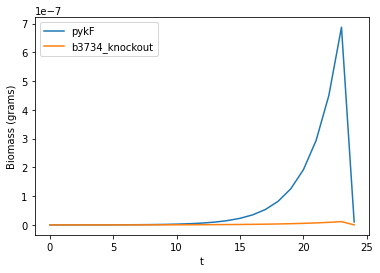

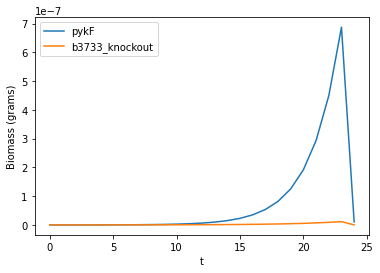

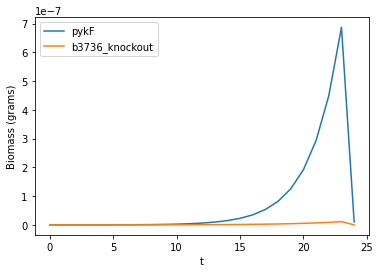

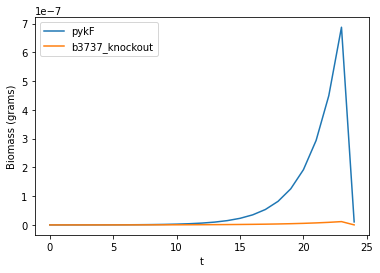

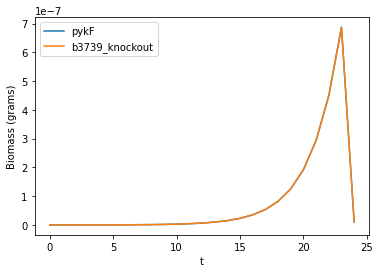

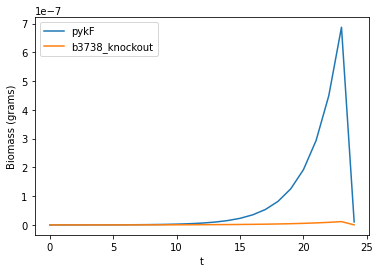

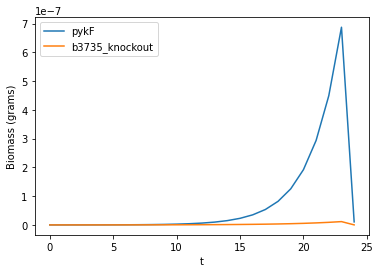

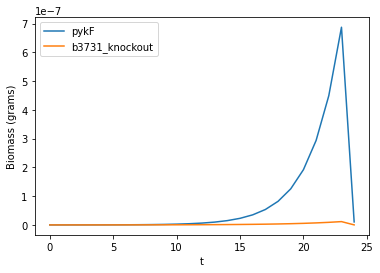

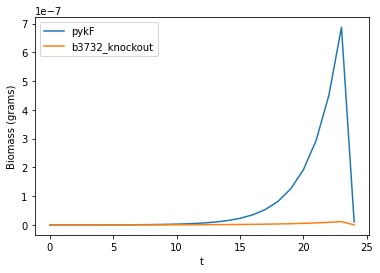

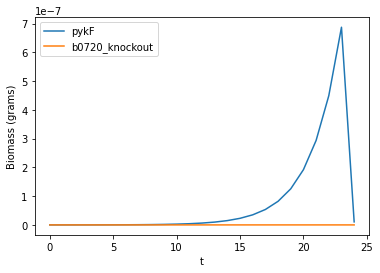

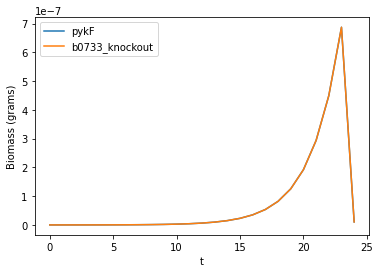

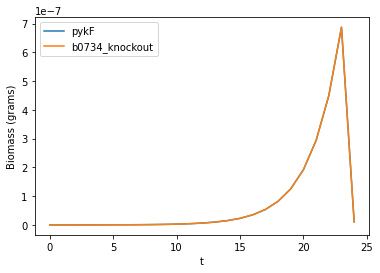

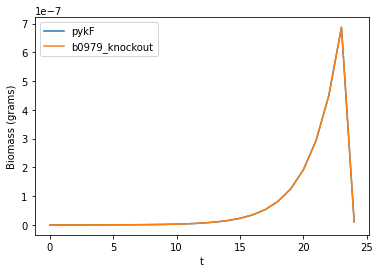

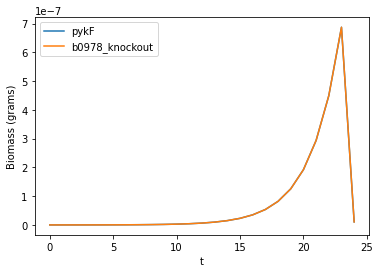

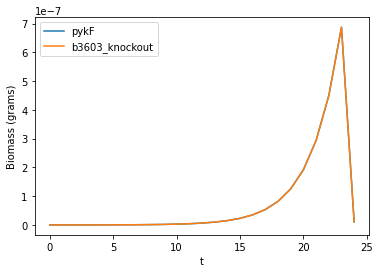

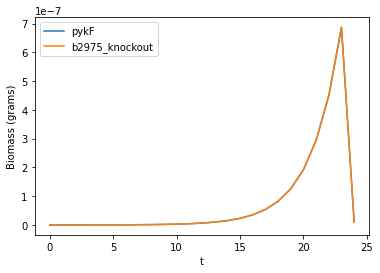

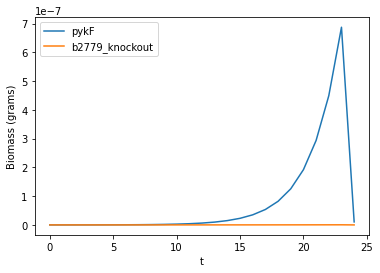

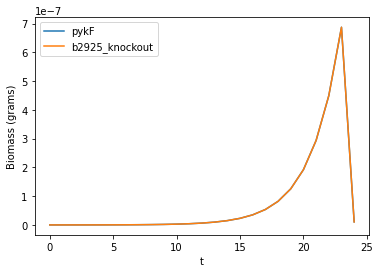

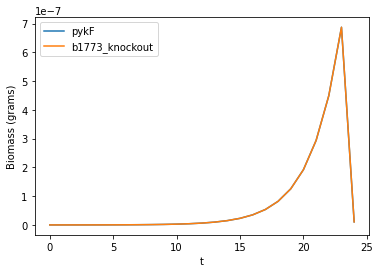

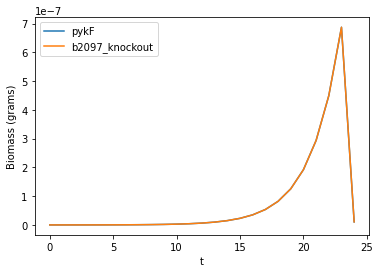

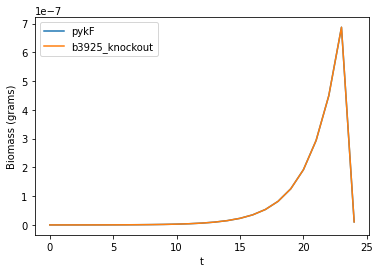

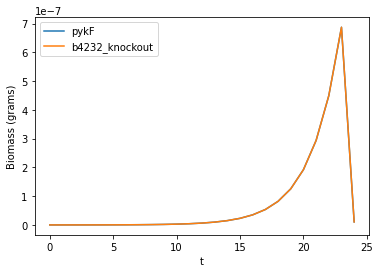

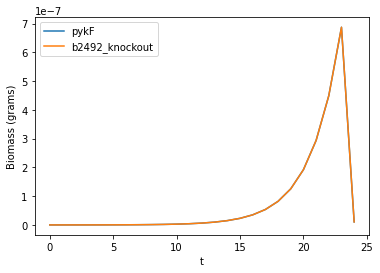

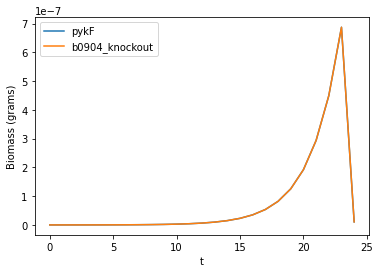

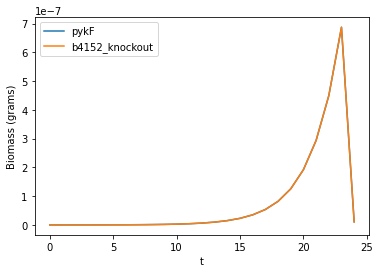

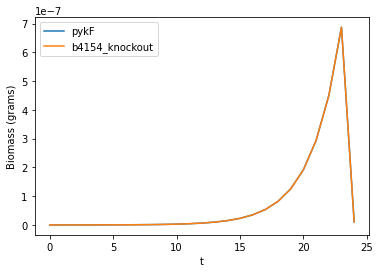

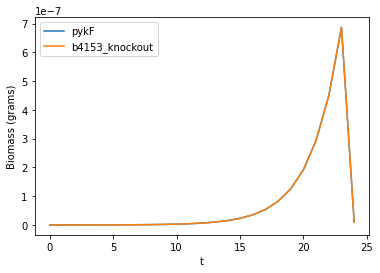

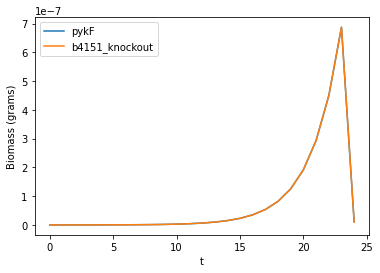

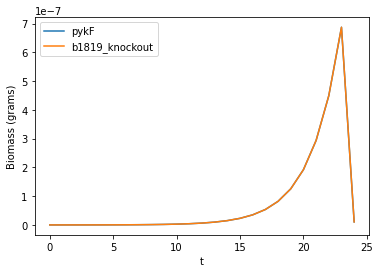

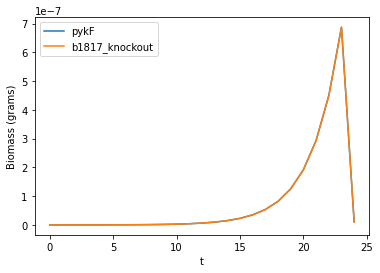

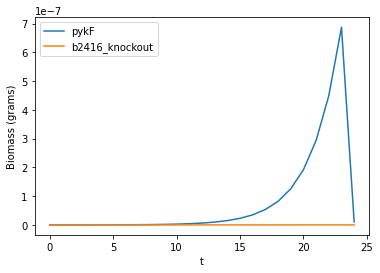

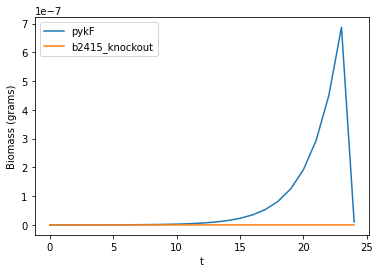

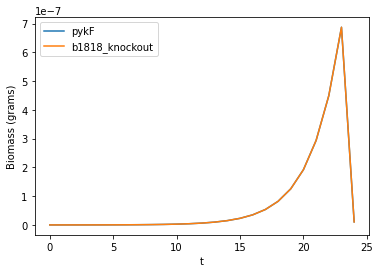

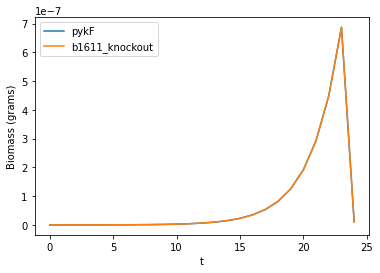

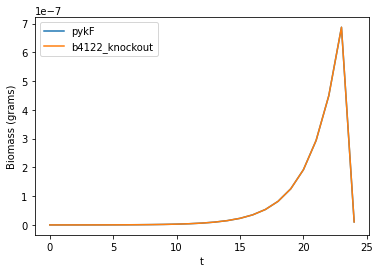

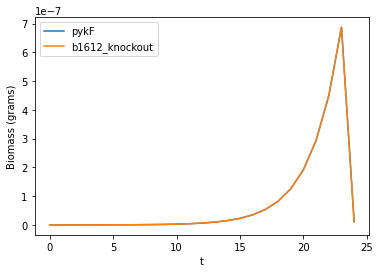

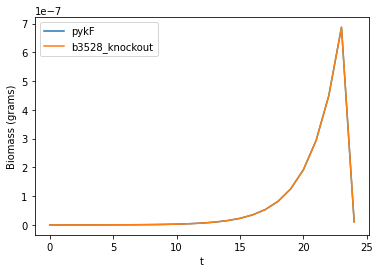

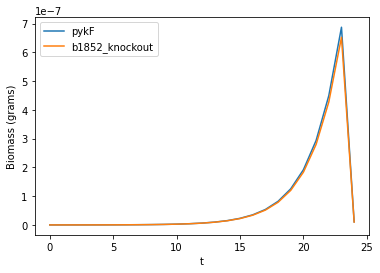

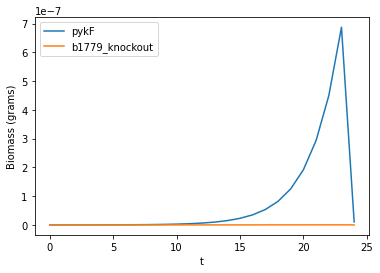

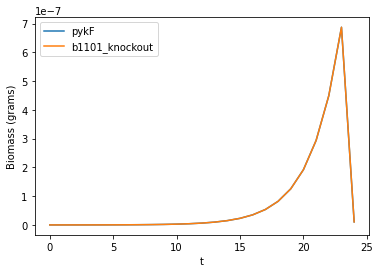

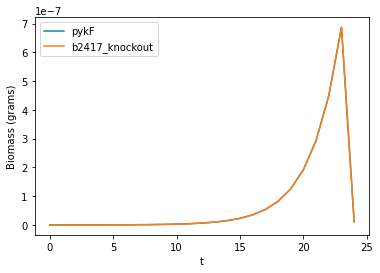

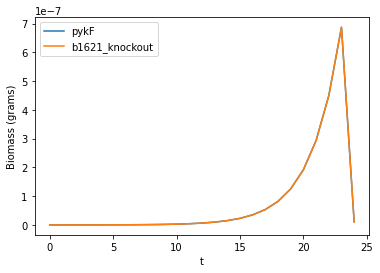

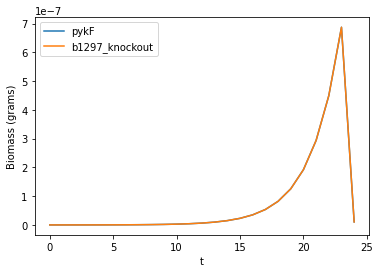

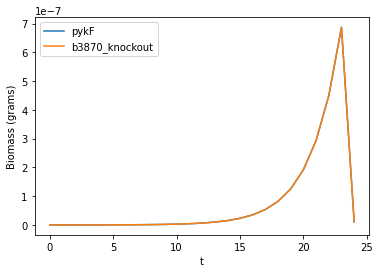

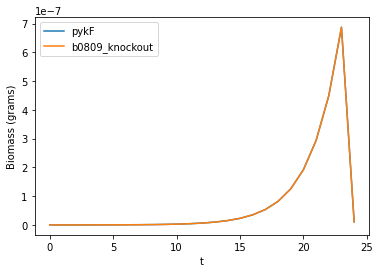

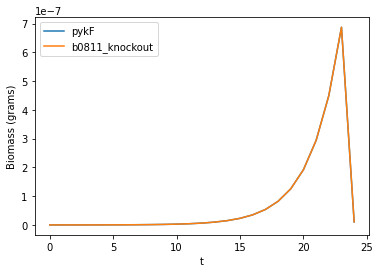

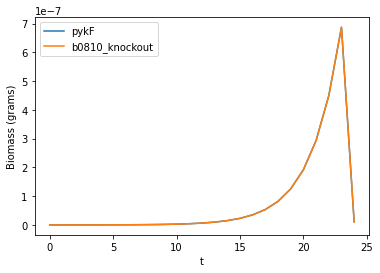

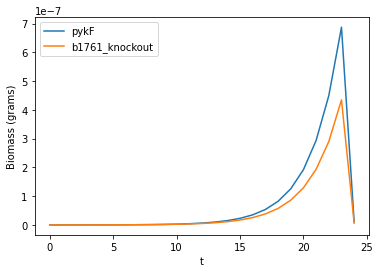

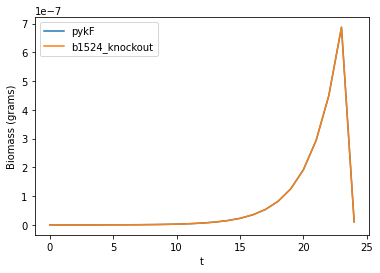

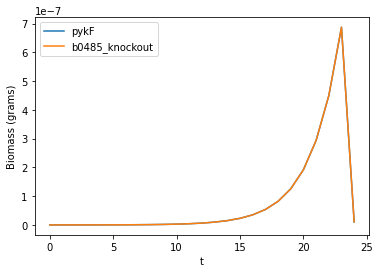

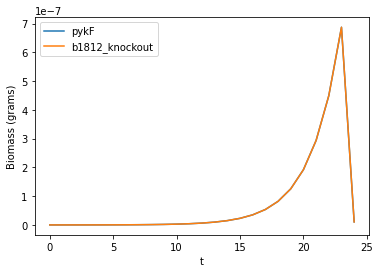

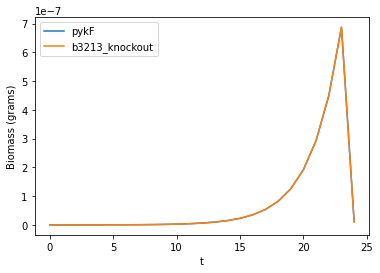

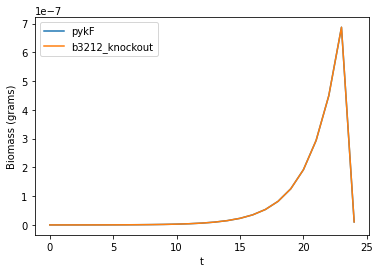

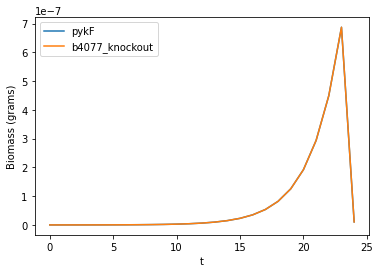

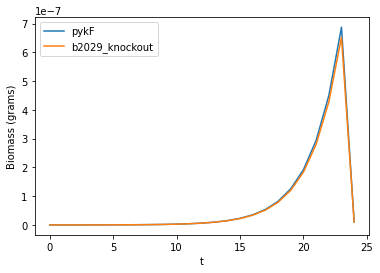

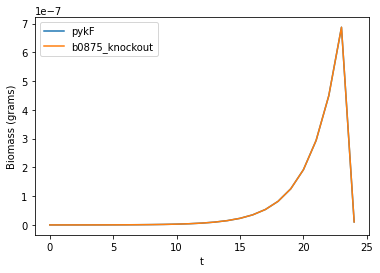

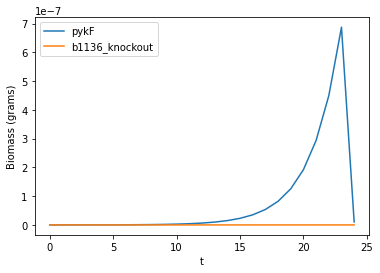

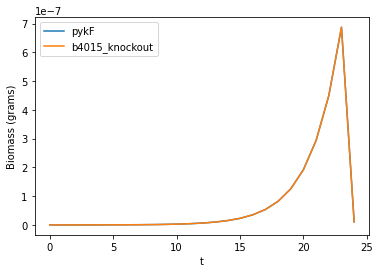

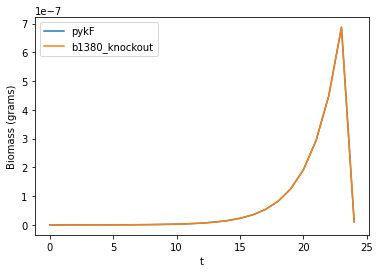

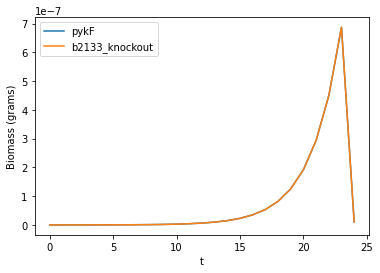

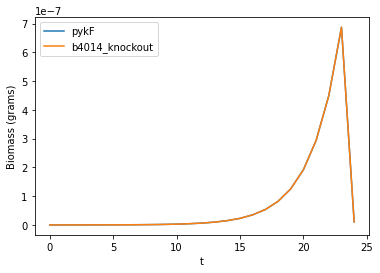

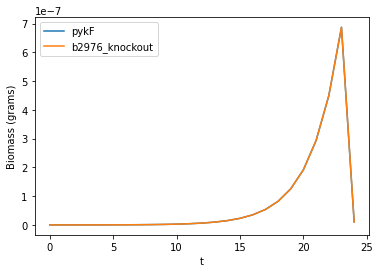

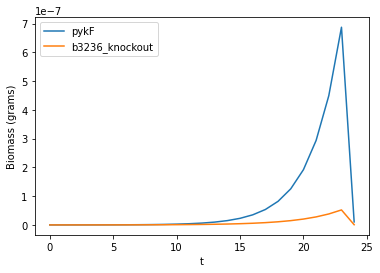

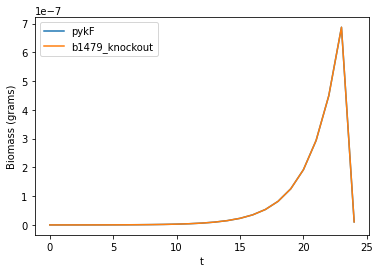

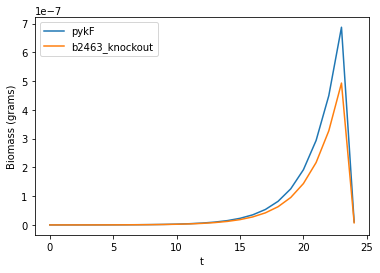

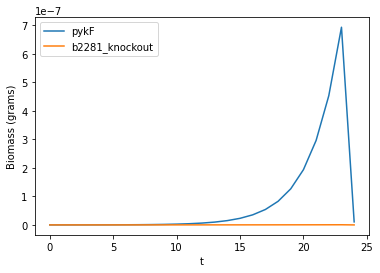

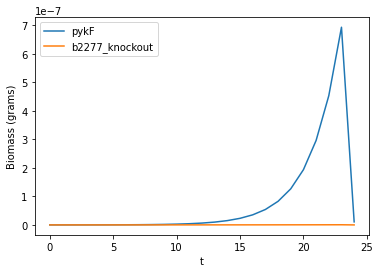

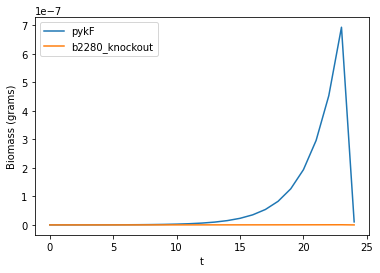

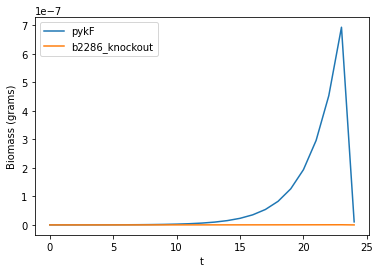

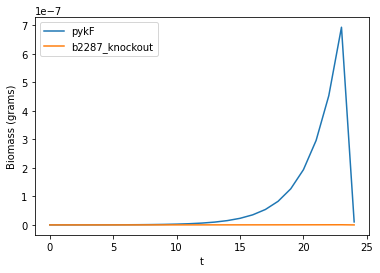

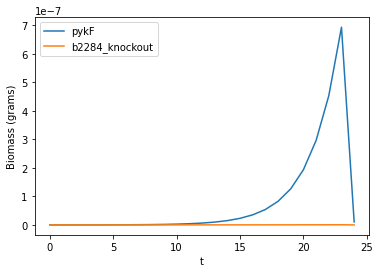

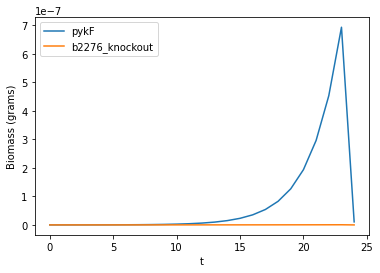

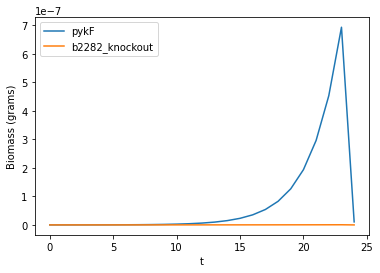

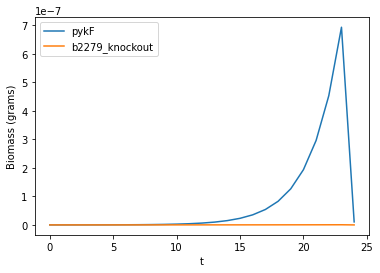

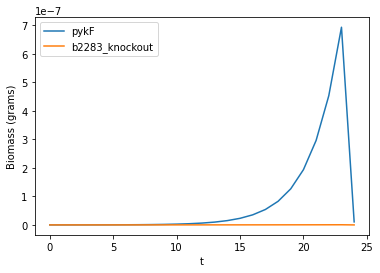

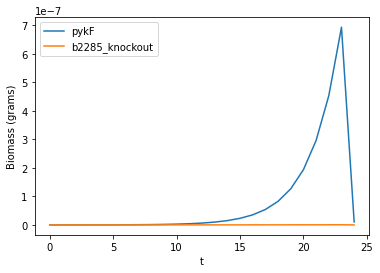

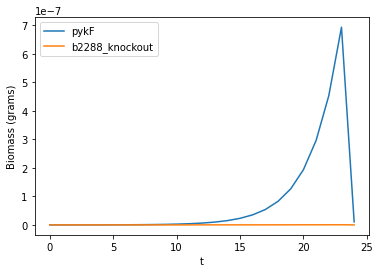

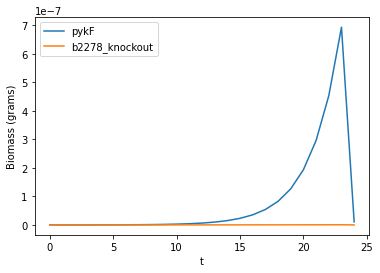

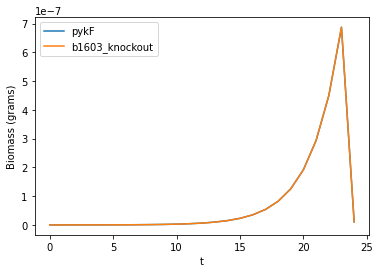

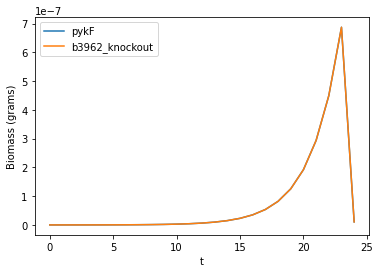

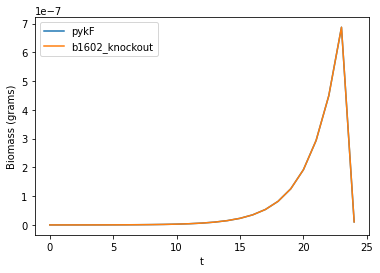

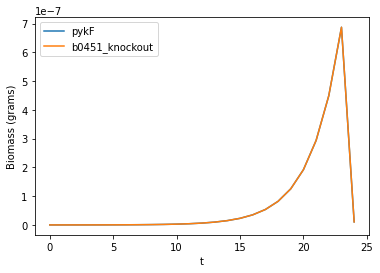

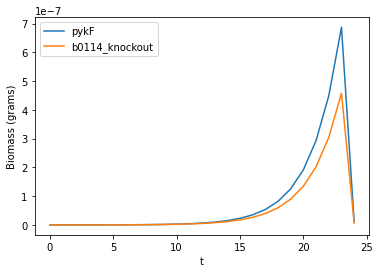

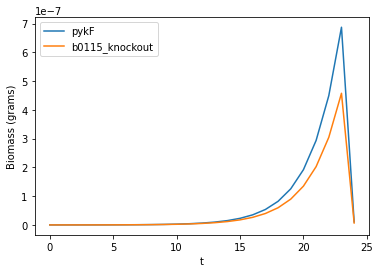

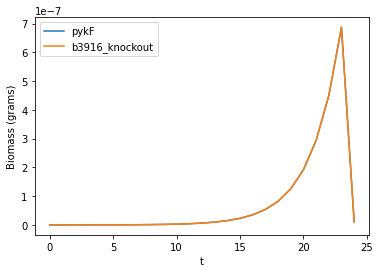

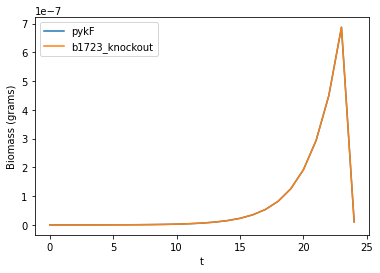

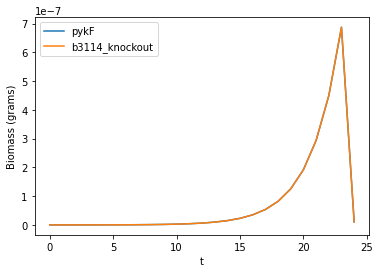

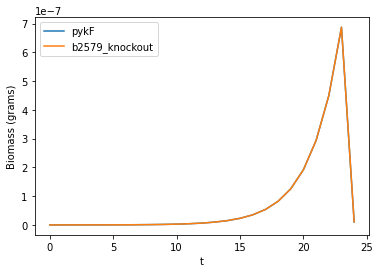

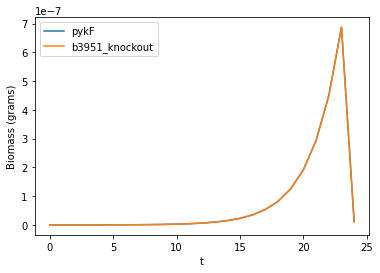

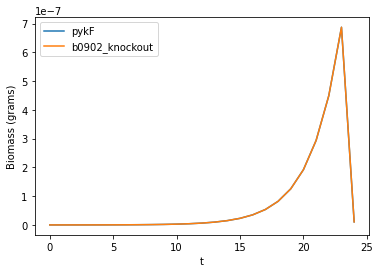

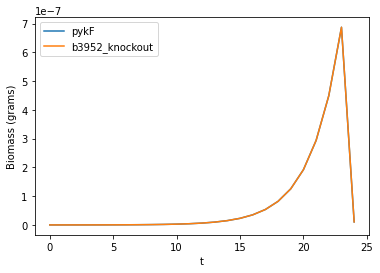

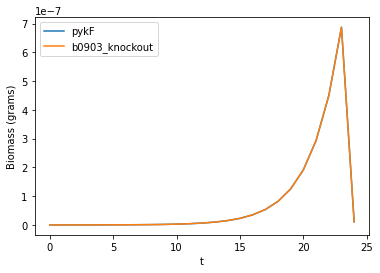

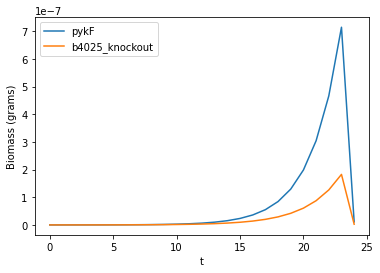

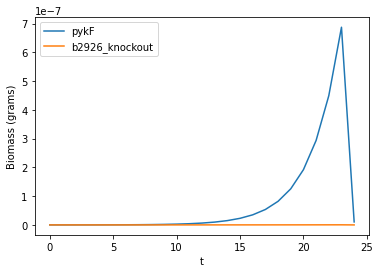

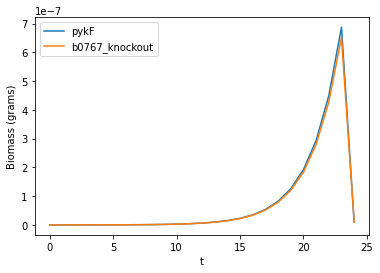

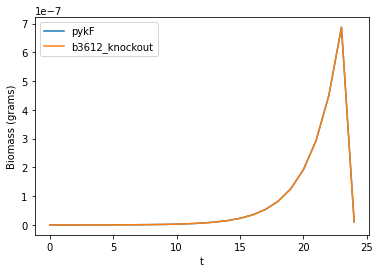

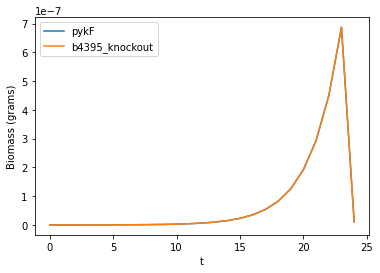

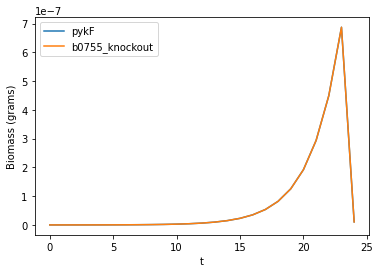

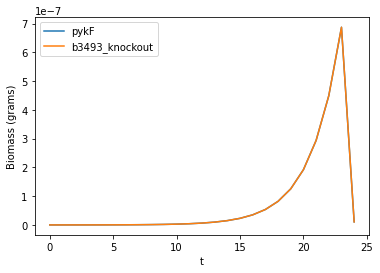

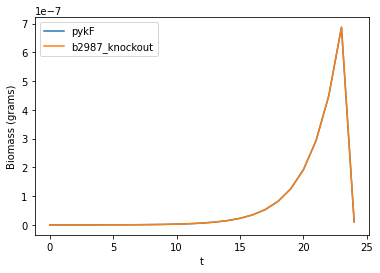

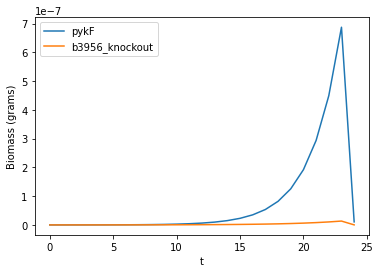

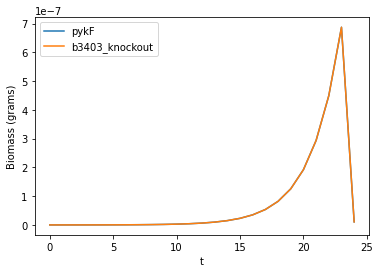

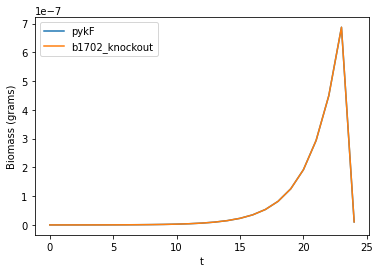

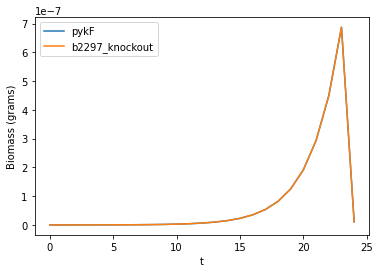

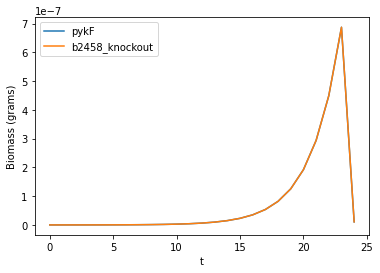

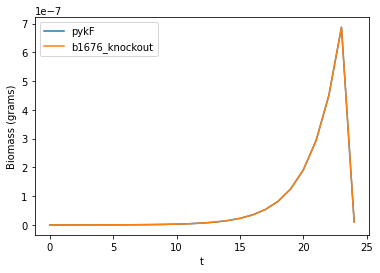

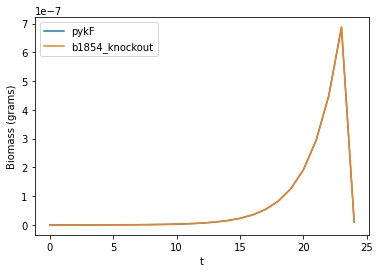

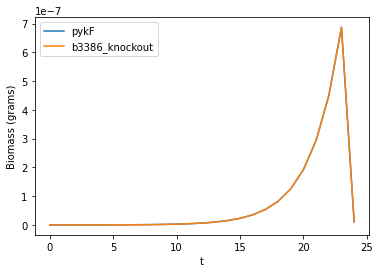

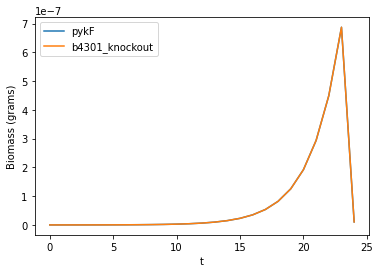

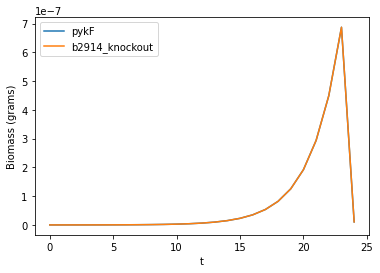

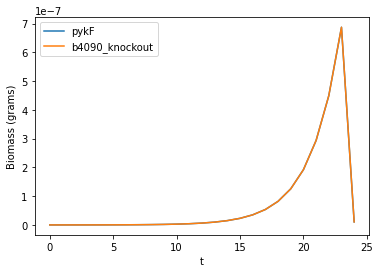

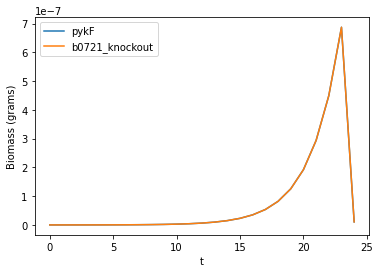

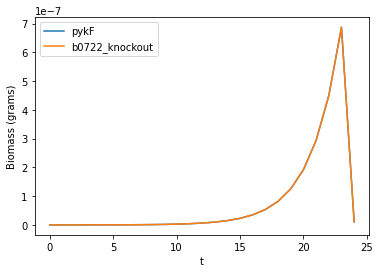

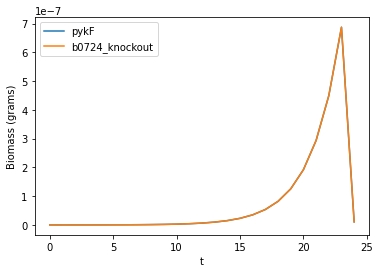

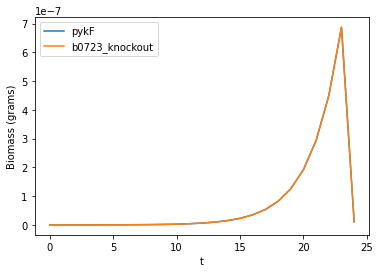

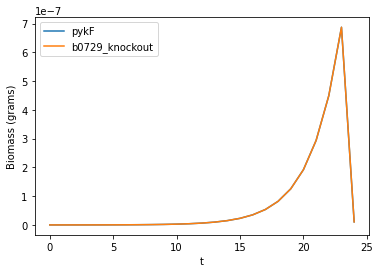

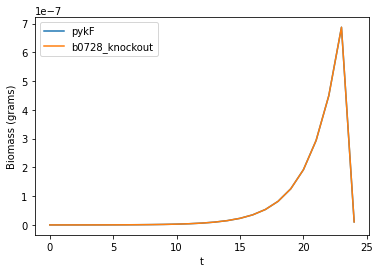

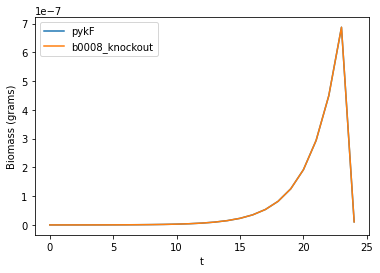

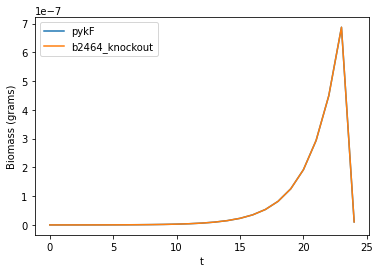

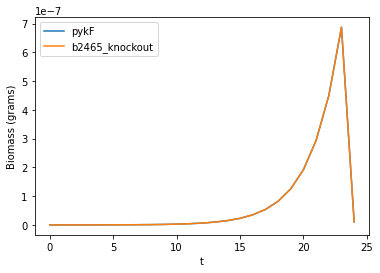

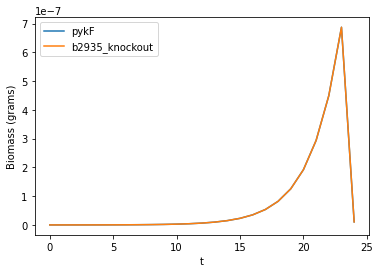

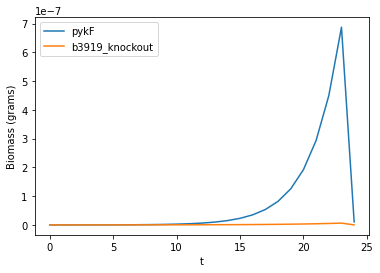

In [10]:
pykF_DFE_vec = [run_COMETS_DM25_fitness_competition(pykF_mut, mut) for (_, mut) in pykF_mut_deletion_cobra_models.items()]

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

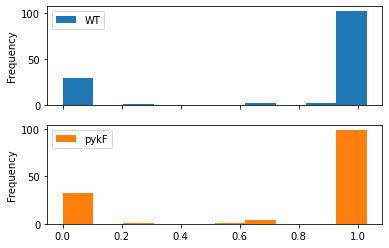

In [20]:
pykF_DFE_comparison_df = pd.DataFrame({
    "WT":WT_DFE_vec, "pykF":pykF_DFE_vec})
    ##{'fitness': WT_DFE_vec + pykF_DFE_vec,
    ## 'genotype' : ["WT"]*len(WT_DFE_vec)+["pykF_knockout"]*len(pykF_DFE_vec)})
pykF_DFE_comparison_df.plot(kind="hist", subplots=True)

In [29]:
print(np.mean(WT_DFE_vec))
print(np.mean(pykF_DFE_vec))
print(stats.ranksums(WT_DFE_vec, pykF_DFE_vec)) ## no significant difference.

0.772417515051623
0.7482121592073755
RanksumsResult(statistic=1.280804943090098, pvalue=0.20026218738139467)


## Question 2: Measure fitness of 50K A clones using just the E. coli core model.

In [ ]:
## Question 3: Measure fitness of 50K A clones with 